# Lero


In [5]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import torch
import pandas as pd
import numpy as np
# import pickle
# from torch_geometric.loader import DataLoader
from util.eval_util import describe_plot, plot_step_curve #, comput_uncertainty
# from util.util import set_seed
# from pyg_data import queryPlanPGDataset, queryPlanPGDataset_nosplit, queryPlanPGDataset_withbenchmark


In [6]:
plots_id = 'lero_job'
show_fig=True

In [7]:
import matplotlib.pyplot as plt

In [138]:
import pickle

# exp_id = 'ceb-13k-500'
# exp_id = 'ceb_1000_x5'
exp_id = 'ceb_1000_x5_s9'
test_split = 'test'

with open('../results/qerror_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    qerror_dict = pickle.load(file)

with open('../results/corr_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    corr_dict = pickle.load(file)
    
with open('../results/rt_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    rt_res_dict = pickle.load(file)

with open('../results/so_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    so_res_dict = pickle.load(file)

with open('../results/agg_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    agg_res_dict = pickle.load(file)

In [139]:
import pickle

# exp_id = 'ceb-13k-500'
# exp_id = 'ceb_1000'
exp_id = 'ceb_1000_x5_s9'
test_split = 'benchmark'

with open('../results/qerror_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_qerror_dict = pickle.load(file)

with open('../results/corr_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_corr_dict = pickle.load(file)
    
with open('../results/rt_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_rt_res_dict = pickle.load(file)

with open('../results/so_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_so_res_dict = pickle.load(file)

with open('../results/agg_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_agg_res_dict = pickle.load(file)

In [1]:
import pickle

# exp_id = 'ceb-13k-500'
# exp_id = 'job_main_x5_s1'
# exp_id = 'job_main_x5_c2'
exp_id = 'job_main_5m03ex10kf_s1'
test_split = 'kfoldcv'

with open('../results/qerror_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_main_qerror_dict = pickle.load(file)

with open('../results/corr_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_main_corr_dict = pickle.load(file)
    
with open('../results/rt_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_main_rt_res_dict = pickle.load(file)

with open('../results/so_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_main_so_res_dict = pickle.load(file)

with open('../results/agg_res_dict_{}_{}.pkl'.format(exp_id,test_split), 'rb') as file:
    job_main_agg_res_dict = pickle.load(file)

In [28]:
# tpcds_exp_id = 'roq_vs_neo_bao_vanilla_plus'

# with open('../results/tpcds/qerror_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_qerror_dict = pickle.load(file)

# with open('../results/tpcds/corr_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_corr_dict = pickle.load(file)
    
# with open('../results/tpcds/rt_res_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_rt_res_dict = pickle.load(file)

# with open('../results/tpcds/so_res_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_so_res_dict = pickle.load(file)

# with open('../results/tpcds/agg_res_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_agg_res_dict = pickle.load(file)

In [29]:
# tpcds_exp_id = 'wl_shift_base'

# with open('../results/tpcds/qerror_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_ood_base_qerror_dict = pickle.load(file)

# with open('../results/tpcds/corr_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_ood_base_corr_dict = pickle.load(file)

In [30]:
# tpcds_exp_id = 'wl_shift_ood'

# with open('../results/tpcds/qerror_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_ood_qerror_dict = pickle.load(file)

# with open('../results/tpcds/corr_dict_{}.pkl'.format(tpcds_exp_id), 'rb') as file:
#     tpcds_ood_corr_dict = pickle.load(file)

In [3]:
def collect_res(res_dict):
    res_all = []
    for i in res_dict:
        res_all.append(res_dict[i].values)
    res_all=np.array(res_all)
    res_df = res_dict[0].copy()
    res_var_df = res_dict[0].copy()
    res_df.loc[:, :] = np.mean(res_all,axis=0)
    res_var_df.loc[:, :] = res_all.std(axis=0)
    return res_df, res_var_df

In [140]:
qerror_all_df,qerror_all_var_df=collect_res(qerror_dict)

In [141]:
job_qerror_all_df,job_qerror_all_var_df=collect_res(job_qerror_dict)

In [8]:
job_main_qerror_all_df, job_main_qerror_all_var_df=collect_res(job_main_qerror_dict)

/database/config/db2inst1/miniconda3/envs/pyg311/lib/python3.11/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [11]:
job_main_qerror_all_df[['Bao','Neo','Balsa','Roq']].describe().T

,count,mean,std,min,25%,50%,75%,max
Bao,1417.0,8.660061,31.775251,1.001109,1.546445,2.544838,5.374975,644.564026
Neo,1417.0,3.963022,8.948785,1.000054,1.350808,1.930309,3.594919,109.603561
Balsa,1417.0,4.185944,7.491201,1.001219,1.500643,2.267764,4.131636,125.845917
Roq,1417.0,2.494886,2.237123,1.000281,1.304244,1.734230,2.703620,22.300566


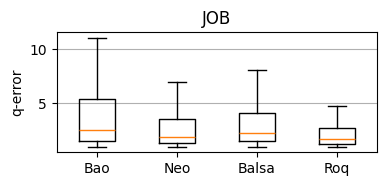

In [13]:
models = ['Bao','Neo','Balsa','Roq']

job_main_qerror_all_df=job_main_qerror_all_df[models]
# tpcds_qerror_all_df=tpcds_qerror_all_df[models]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 1.5), sharey=False)
axs.boxplot(job_main_qerror_all_df, labels=models, showfliers=False)
axs.set_title('JOB')
# axs[0].set_yscale('log')
axs.set_ylabel('q-error')
axs.grid(visible=True,which='both',axis='y')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

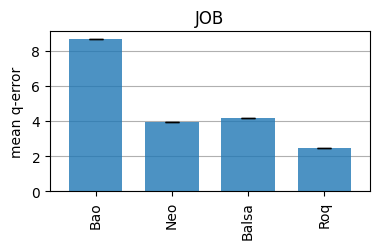

In [21]:
models = ['Bao','Neo','Balsa','Roq']

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 2), sharey=False)

y1 = job_main_qerror_all_df[models].mean(axis=0)
yerr1 = job_main_qerror_all_var_df[models].mean(axis=0)

ax1 =y1.plot.bar(logy=False,
               yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs)
ax1.set_title('JOB')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.tick_params(axis='x', rotation=90)

fig.supylabel('mean q-error',x=0, size=10)
# plt.text(x=-10.5,y=-14,s='(a)',fontfamily='serif')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

In [17]:
job_main_corr_all_df,job_main_corr_all_var_df=collect_res(job_main_corr_dict)


In [22]:
job_main_corr_all_df

,Cost,Bao,Neo,Lero,Balsa,Roq,Roq MCDO
Pearson,0.037334,0.238761,0.520869,0.081050,0.546774,0.734802,0.724192
Spearman,0.633299,0.487281,0.754624,0.137349,0.671435,0.848497,0.847213


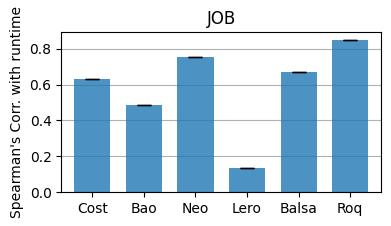

In [24]:
models = ['Cost','Bao','Neo','Lero','Balsa','Roq']
# models = ['Neo','Bao','Lero','Roq']
logy=False

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 2), sharey=True)

y1 = job_main_corr_all_df.loc['Spearman',models]
yerr1 = job_main_corr_all_var_df.loc['Spearman',models]

ax1 =y1.plot.bar(logy=logy,
                yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs)
ax1.set_title('JOB')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylabel('Spearman\'s Corr. with runtime')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)


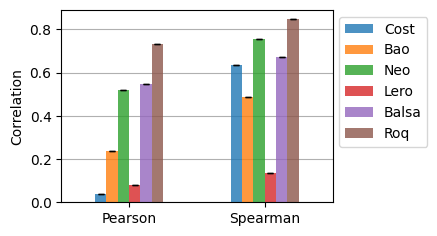

In [81]:
models = ['Cost','Bao','Neo','Lero','Balsa','Roq']

ax =job_main_corr_all_df.loc[:,models].plot.bar(logy=False,figsize=[3.5,2.5],yerr=job_main_corr_all_var_df.loc[:,models].T.values,
               align='center', alpha=0.8, ecolor='black', capsize=2.5)
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Correlation')
plt.xticks(rotation=0,ha='center')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()

In [25]:
job_main_runtimes_all_df,job_main_runtimes_all_var_df=collect_res(job_main_rt_res_dict)


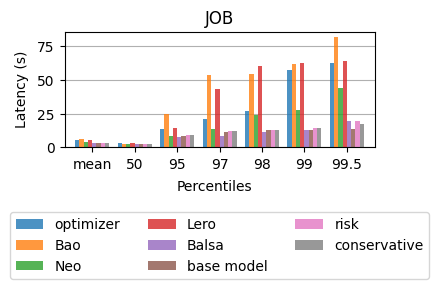

In [42]:
models = [
    'optimizer',
    'Bao', 
    'Neo', 
    'Lero',
    'Balsa',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    # 'cons. prun. RN',
    # 'cons. prun. SO',
    # 'risk prun. RN',
    # 'risk prun. SO'
    ]
percentiles = [.5,.75,.85,.95,.97,.98,.99,.995]
labels = ['mean','50%','95%','97%','98%','99%','99.5%']
rename = {'50%':'50', '95%':'95', '97%':'97','98%':'98', '99%':'99', '99.5%':'99.5'}
logy=False

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 1.5), sharex=True)

sub1 = job_main_runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub_var1 = job_main_runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub1.rename(rename,axis=0,inplace=True)

ax1 = sub1.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs, legend=False,
    yerr=sub_var1,
    width=.8
    )
ax1.set_xticks(ticks=np.arange(len(labels)),labels=sub1.index,rotation=0,ha='center')
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB')
# ax1.set_ylim(0,65)


lhandles, llabels = ax1.get_legend_handles_labels()
# rhandles, rlabels = ax.right_ax.get_legend_handles_labels()
ax1.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.2), ncol=3)

# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.supylabel('Latency (s)',x=0,size=10)
fig.supxlabel('Percentiles',y=-.2,size=10)
# plt.savefig('./plots/subopt_bar_main_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

In [43]:
sub1

,optimizer,Bao,Neo,Lero,Balsa,base model,risk,conservative
mean,5.366988,6.482676,3.921254,5.562198,3.297708,3.011535,3.161493,3.178834
50,3.221009,2.573937,2.535842,2.860206,2.641069,2.265132,2.302578,2.511198
95,13.254869,24.977916,8.519750,14.234606,7.784616,8.346424,9.221841,9.072222
97,20.906906,53.302503,13.896858,43.216224,8.361003,11.487902,11.963747,12.199305
98,27.165803,53.975587,23.634439,60.112998,11.277593,12.694345,12.815501,12.865092
99,57.147899,61.929732,27.893841,62.549402,12.748773,12.957373,14.362614,14.362614
99.5,62.748821,81.483790,43.985770,63.962989,19.860313,13.665508,19.494887,17.132647


In [44]:
job_main_agg_res_all_df,job_main_agg_res_all_var_df=collect_res(job_main_agg_res_dict)


In [49]:
sub1

,improved,improved_runtime,average_improvement,regressed,regressed_runtime,average_regression,unchanged,total_runtime_change%,total_runtime_change,average_runtime_change,total_subopt,mean,median,60%,70%,80%,90%,95th,99th,max
Neo,0.550459,262.298011,4.371634,0.247706,104.713038,3.878261,0.201835,-0.269375,-157.584973,-1.445734,0.730625,1.654492,1.344345,1.501245,1.643195,1.791526,2.337998,3.024730,5.072577,12.347844
Bao,0.541284,257.992169,4.372749,0.366972,379.602162,9.490054,0.091743,0.207880,121.609993,1.115688,1.207880,2.971952,1.324103,1.441154,1.639662,2.106390,5.034951,11.843982,20.164874,50.484230
Lero,0.256881,202.067268,7.216688,0.174312,223.345151,11.755008,0.568807,0.036372,21.277882,0.195210,1.036372,2.276684,1.519670,1.657303,1.800163,2.341422,3.375209,5.486877,13.325803,16.494621
base model,0.587156,301.757249,4.714957,0.321101,45.012841,1.286081,0.091743,-0.438878,-256.744409,-2.355453,0.561122,1.714131,1.249638,1.367375,1.495751,1.686215,2.351758,2.869565,14.425559,16.742505
risk,0.614679,294.282294,4.392273,0.302752,53.883290,1.632827,0.082569,-0.410937,-240.399004,-2.205495,0.589063,1.572736,1.210448,1.305704,1.466494,1.643756,1.945298,2.877808,5.203186,15.265331
conservative,0.568807,277.413721,4.474415,0.275229,38.904932,1.296831,0.155963,-0.407706,-238.508789,-2.188154,0.592294,1.592646,1.236573,1.333784,1.499290,1.662143,2.194694,2.850070,5.122945,15.265331
cons. prun. RN,0.568807,270.519591,4.363219,0.266055,37.981692,1.309714,0.165138,-0.397500,-232.537899,-2.133375,0.602500,1.592545,1.236573,1.333784,1.502932,1.666211,2.219940,2.850070,6.995895,10.886990
cons. prun. SO,0.559633,262.307890,4.300129,0.275229,22.311280,0.743709,0.165138,-0.410249,-239.996611,-2.201804,0.589751,1.666270,1.219748,1.305704,1.499290,1.662143,2.338348,3.004199,10.433084,15.265331
risk prun. RN,0.577982,263.553524,4.183389,0.284404,42.036372,1.356012,0.137615,-0.378661,-221.517151,-2.032267,0.621339,1.553938,1.228035,1.305704,1.481149,1.668121,2.165801,2.850070,6.995895,10.886990
risk prun. SO,0.587156,271.026548,4.234790,0.311927,33.939401,0.998218,0.100917,-0.405276,-237.087147,-2.175111,0.594724,1.665489,1.210610,1.282994,1.471932,1.676507,2.211203,3.399001,10.433084,15.265331


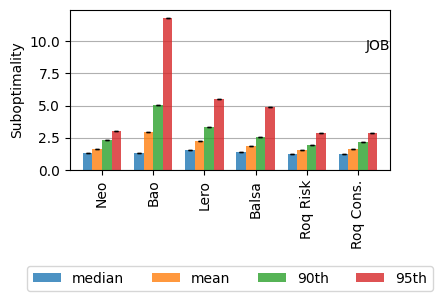

In [74]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero', 'Balsa',
    # 'base model',
    'risk',
    'conservative',
    # 'cons. prun. RN',
    # 'cons. prun. SO',
    # 'risk prun. RN',
    # 'risk prun. SO'
    ]

rename = {'50%':'median', '90%':'90th', '95%':'95th', '99%':'99th'}
rename_index = {'optimizer':'Opt.','risk':'Roq Risk','conservative':'Roq Cons.'}
data_points = ['median','mean','90th','95th']
logy=False

sub1 = job_main_agg_res_all_df.loc[labels,:].copy()
sub_var1 = job_main_agg_res_all_var_df.loc[labels,:].copy()
sub1.rename(rename,axis=1,inplace=True)
sub1.rename(rename_index,axis=0,inplace=True)
sub_var1.rename(rename,axis=1,inplace=True)
sub_var1.rename(rename_index,axis=0,inplace=True)

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 2), sharex=True)

ax2=sub1.loc[:,data_points].plot.bar(
    logy=logy, 
    # secondary_y=['99th'],
    yerr=sub_var1.loc[:,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs,
    legend=False
    )
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('JOB',fontsize=10,loc='right',y=.7)

lhandles, llabels = ax2.get_legend_handles_labels()
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -.8), ncol=4)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
fig.supylabel('Suboptimality',x=-.05,size=10)

plt.show()

In [67]:
sub1

,improved,improved_runtime,average_improvement,regressed,regressed_runtime,average_regression,unchanged,total_runtime_change%,total_runtime_change,average_runtime_change,total_subopt,mean,median,60%,70%,80%,90th,95th,99th,max
Neo,0.550459,262.298011,4.371634,0.247706,104.713038,3.878261,0.201835,-0.269375,-157.584973,-1.445734,0.730625,1.654492,1.344345,1.501245,1.643195,1.791526,2.337998,3.024730,5.072577,12.347844
Bao,0.541284,257.992169,4.372749,0.366972,379.602162,9.490054,0.091743,0.207880,121.609993,1.115688,1.207880,2.971952,1.324103,1.441154,1.639662,2.106390,5.034951,11.843982,20.164874,50.484230
Lero,0.256881,202.067268,7.216688,0.174312,223.345151,11.755008,0.568807,0.036372,21.277882,0.195210,1.036372,2.276684,1.519670,1.657303,1.800163,2.341422,3.375209,5.486877,13.325803,16.494621
Balsa,0.458716,255.600126,5.112003,0.330275,30.048578,0.834683,0.211009,-0.385557,-225.551548,-2.069280,0.614443,1.824158,1.419578,1.525160,1.700613,1.811561,2.584386,4.922830,6.386478,16.742505
Roq Risk,0.614679,294.282294,4.392273,0.302752,53.883290,1.632827,0.082569,-0.410937,-240.399004,-2.205495,0.589063,1.572736,1.210448,1.305704,1.466494,1.643756,1.945298,2.877808,5.203186,15.265331
Roq Cons.,0.568807,277.413721,4.474415,0.275229,38.904932,1.296831,0.155963,-0.407706,-238.508789,-2.188154,0.592294,1.592646,1.236573,1.333784,1.499290,1.662143,2.194694,2.850070,5.122945,15.265331


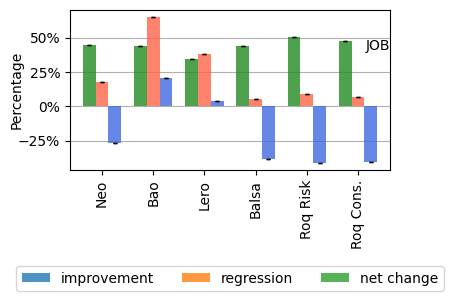

In [77]:
import matplotlib.ticker as mtick

labels = [
    # 'optimizer',
    'Neo','Bao','Lero','Balsa',
    # 'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    # 'cons. prun. RN',
    # 'cons. prun. SO',
    # 'risk prun. RN',
    # 'risk prun. SO'
    ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]
rename_index = {'optimizer':'Opt.','risk':'Roq Risk','conservative':'Roq Cons.'}

sub1 = job_main_agg_res_all_df.loc[labels,features]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,features]
sub1.rename(rename_index,axis=0,inplace=True)
sub_var1.rename(rename_index,axis=0,inplace=True)

sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100


fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 2), sharex=True)

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs)

ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB',fontsize=10,loc='right',y=.7)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

lhandles, llabels = ax2.get_legend_handles_labels()
llabels = ["improvement","regression","net change"]
ax1.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -.8), ncol=3)

fig.supylabel('Percentage',x=-.05,size=10)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
# plt.savefig('./plots/runtime_bar_main_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()




In [78]:
job_main_runtimes_all_df,job_main_runtimes_all_var_df=collect_res(job_main_rt_res_dict)


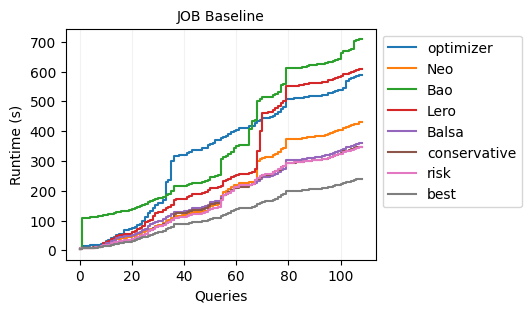

In [79]:
labels = [
                 'optimizer',#'optimizer pruned',
                 'Neo','Bao','Lero','Balsa',
                #  'Neo+','Bao+',
                #  'base model',#'base model pruned',
                #  'mc dropout',
                 'conservative',#'cons. prun. RN',
                 'risk',#'risk prun. RN',
                'best'
                ]

values = job_main_runtimes_all_df.loc[:,labels].sort_index().values.T

plot_step_curve(values,labels,scale='linear',figsize=[4,3],title='JOB Baseline',
                save_to='./plots/runtime_step_ext_base_{}.png'.format(plots_id),bbox_to_anchor=(1.0, 1.0),show_fig=show_fig, legend=True)

In [35]:
# tpcds_qerror_all_df,tpcds_qerror_all_var_df=collect_res(tpcds_qerror_dict)

In [36]:
# tpcds_ood_base_qerror_df, tpcds_ood_base_qerror_var_df = collect_res(tpcds_ood_base_qerror_dict)

In [37]:
# tpcds_ood_qerror_df, tpcds_ood_qerror_var_df = collect_res(tpcds_ood_qerror_dict)


In [38]:
# tpcds_ood_base_corr_df, tpcds_ood_base_corr_var_df = collect_res(tpcds_ood_base_corr_dict)


In [39]:
# tpcds_ood_corr_df, tpcds_ood_corr_var_df = collect_res(tpcds_ood_corr_dict)


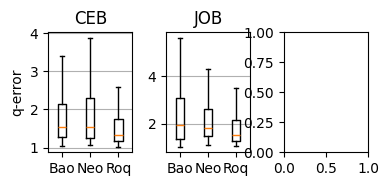

In [166]:
models = ['Bao','Neo','Roq']

qerror_all_df=qerror_all_df[models]
job_main_qerror_all_df=job_main_qerror_all_df[models]
# tpcds_qerror_all_df=tpcds_qerror_all_df[models]

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4, 1.5), sharey=False)
axs[0].boxplot(qerror_all_df, labels=models, showfliers=False)
axs[0].set_title('CEB')
# axs[0].set_yscale('log')
axs[0].set_ylabel('q-error')
axs[0].grid(visible=True,which='both',axis='y')

axs[1].boxplot(job_main_qerror_all_df, labels=models, showfliers=False)
axs[1].set_title('JOB')
# axs[1].set_yscale('log')
axs[1].grid(visible=True,which='both',axis='y')

# axs[2].boxplot(tpcds_qerror_all_df, labels=models, showfliers=False)
# axs[2].set_title('TPCDS')
# # axs[1].set_yscale('log')
# axs[2].grid(visible=True,which='both',axis='y')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()


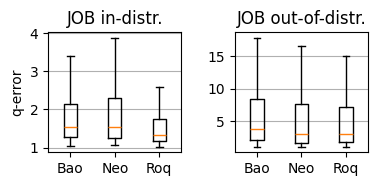

In [167]:
models = ['Bao','Neo','Roq']

job_main_qerror_all_df=qerror_all_df[models]
job_qerror_all_df=job_qerror_all_df[models]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 1.5), sharey=False)
axs[0].boxplot(job_main_qerror_all_df, labels=models, showfliers=False)
axs[0].set_title('JOB in-distr.')
# axs[0].set_yscale('log')
axs[0].set_ylabel('q-error')
axs[0].grid(visible=True,which='both',axis='y')

axs[1].boxplot(job_qerror_all_df, labels=models, showfliers=False)
axs[1].set_title('JOB out-of-distr.')
# axs[1].set_yscale('log')
axs[1].grid(visible=True,which='both',axis='y')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

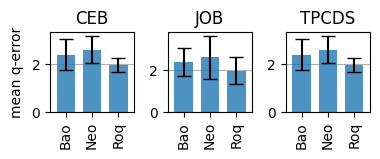

In [168]:
models = ['Bao','Neo','Roq']

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4, 1), sharey=False)
y = qerror_all_df[models].mean(axis=0)
yerr = qerror_all_var_df[models].mean(axis=0)
y1 = job_main_qerror_all_df[models].mean(axis=0)
yerr1 = job_main_qerror_all_var_df[models].mean(axis=0)
# y2 = tpcds_qerror_all_df[models].mean(axis=0)
# yerr2 = tpcds_qerror_all_var_df[models].mean(axis=0)

ax =y.plot.bar(logy=False,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0])
ax.set_title('CEB')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.tick_params(axis='x', rotation=90)

ax1 =y1.plot.bar(logy=False,
               yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1])
ax1.set_title('JOB')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.tick_params(axis='x', rotation=90)

ax2 =y.plot.bar(logy=False,
                yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[2])
ax2.set_title('TPCDS')
ax2.grid(visible=True,which='both',axis='y')
ax2.set_axisbelow(True)
ax2.tick_params(axis='x', rotation=90)
fig.supylabel('mean q-error',x=0, size=10)
# plt.text(x=-10.5,y=-14,s='(a)',fontfamily='serif')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
# plt.show()
plt.savefig('./plots/roq_neo_bao_ceb_job_tpcds_qerr_bar_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


In [61]:
percentiles = [.5,.75,.9,.95,.99]
qerror_all_df.describe(percentiles=percentiles).T

,count,mean,std,min,50%,75%,90%,95%,99%,max
Bao,1352.0,2.390327,3.248016,1.050490,1.541616,2.128703,3.674564,5.826969,17.342150,55.876076
Neo,1352.0,2.608493,3.937143,1.061791,1.549160,2.306006,4.482801,6.882802,18.586724,78.330032
Roq,1352.0,2.678261,4.270537,1.031596,1.630644,2.396743,4.469159,7.307599,19.030486,91.569328


In [169]:
job_main_qerror_all_df.describe(percentiles=percentiles).T

,count,mean,std,min,50%,75%,85%,95%,97%,98%,99%,99.5%,max
Bao,1352.0,2.390327,3.248016,1.050490,1.541616,2.128703,2.813742,5.826969,8.779775,11.253514,17.342150,24.356068,55.876076
Neo,1352.0,2.608493,3.937143,1.061791,1.549160,2.306006,3.346350,6.882802,11.438319,13.690071,18.586724,24.092453,78.330032
Roq,1352.0,1.975793,2.258890,1.018977,1.322863,1.745764,2.397088,5.630963,7.888218,9.300558,11.286526,13.488163,48.628002


In [45]:
# tpcds_qerror_all_df.describe(percentiles=percentiles).T

,count,mean,std,min,50%,75%,90%,95%,99%,max
Bao,5532.0,19.315014,89.268784,1.052070,3.687806,10.882474,33.295744,63.377483,260.664861,3111.963379
Neo,5532.0,14.908991,46.655602,1.036969,3.920681,11.735149,36.654887,58.560156,158.689214,1314.806030
Roq,5532.0,9.168344,33.788876,1.026424,2.783381,6.635444,15.473692,30.344881,112.070514,943.302734


In [142]:
corr_all_df,corr_all_var_df=collect_res(corr_dict)

In [143]:
job_corr_all_df,job_corr_all_var_df=collect_res(job_corr_dict)

In [170]:
job_main_corr_all_df,job_main_corr_all_var_df=collect_res(job_main_corr_dict)

In [49]:
# tpcds_corr_all_df,tpcds_corr_all_var_df=collect_res(tpcds_corr_dict)

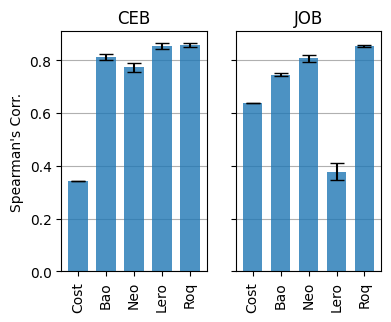

In [175]:
models = ['Cost','Bao','Neo','Lero','Roq']
# models = ['Neo','Bao','Lero','Roq']
logy=False

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(4, 3), sharey=True)
y = corr_all_df.loc['Spearman',models]
yerr = corr_all_var_df.loc['Spearman',models]
y1 = job_main_corr_all_df.loc['Spearman',models]
yerr1 = job_main_corr_all_var_df.loc['Spearman',models]
# y2 = tpcds_corr_all_df.loc['Spearman',models]
# yerr2 = tpcds_corr_all_var_df.loc['Spearman',models]

ax =y.plot.bar(logy=logy,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0])
ax.set_title('CEB')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Spearman\'s Corr.')
ax.tick_params(axis='x', rotation=90)
# ax.set_ylim(0.6,.9)

ax1 =y1.plot.bar(logy=logy,
                yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1])
ax1.set_title('JOB')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.tick_params(axis='x', rotation=90)

# ax2 =y2.plot.bar(logy=logy,
#                 yerr=yerr2.T.values,
#                align='center', alpha=0.8, ecolor='black', capsize=5,
#                width=0.7, ax=axs[2])
# ax2.set_title('TPCDS')
# ax2.grid(visible=True,which='both',axis='y')
# ax2.set_axisbelow(True)
# ax1.tick_params(axis='x', rotation=90)
# ax2.set_ylim(.25,.95)
# plt.text(x=-12,y=-.05,s='(b)',fontfamily='serif')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
# plt.show()
plt.savefig('./plots/roq_neo_bao_ceb_job_tpcds_corr_bar_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


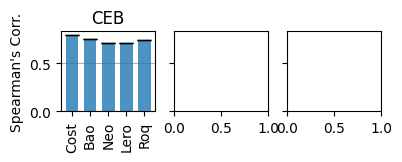

In [16]:
models = ['Cost','Bao','Neo','Lero','Roq']
logy=False

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(4, 1), sharey=True)
y = corr_all_df.loc['Spearman',models]
yerr = corr_all_var_df.loc['Spearman',models]
# y1 = job_main_corr_all_df.loc['Spearman',models]
# yerr1 = job_main_corr_all_var_df.loc['Spearman',models]
# y2 = tpcds_corr_all_df.loc['Spearman',models]
# yerr2 = tpcds_corr_all_var_df.loc['Spearman',models]

ax =y.plot.bar(logy=logy,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0])
ax.set_title('CEB')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Spearman\'s Corr.')
ax.tick_params(axis='x', rotation=90)

# ax1 =y1.plot.bar(logy=logy,
#                 yerr=yerr1.T.values,
#                align='center', alpha=0.8, ecolor='black', capsize=5,
#                width=0.7, ax=axs[1])
# ax1.set_title('JOB')
# ax1.grid(visible=True,which='both',axis='y')
# ax1.set_axisbelow(True)
# ax1.tick_params(axis='x', rotation=90)

# ax2 =y2.plot.bar(logy=logy,
#                 yerr=yerr2.T.values,
#                align='center', alpha=0.8, ecolor='black', capsize=5,
#                width=0.7, ax=axs[2])
# ax2.set_title('TPCDS')
# ax2.grid(visible=True,which='both',axis='y')
# ax2.set_axisbelow(True)
# ax1.tick_params(axis='x', rotation=90)
# ax2.set_ylim(.25,.95)
# plt.text(x=-12,y=-.05,s='(b)',fontfamily='serif')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
# plt.show()
plt.savefig('./plots/roq_neo_bao_ceb_job_tpcds_corr_bar_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


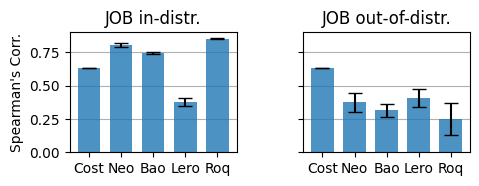

In [178]:
models = ['Cost','Neo','Bao','Lero','Roq']
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(5, 1.5), sharey=True)
y = job_main_corr_all_df.loc['Spearman',models]
yerr = job_main_corr_all_var_df.loc['Spearman',models]
y2 = job_corr_all_df.loc['Spearman',models]
yerr2 = job_corr_all_var_df.loc['Spearman',models]

ax =y.plot.bar(logy=False,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0])
ax.set_title('JOB in-distr.')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Spearman\'s Corr.')
ax.tick_params(axis='x', rotation=0)

ax =y2.plot.bar(logy=False,yerr=yerr2.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1])
ax.set_title('JOB out-of-distr.')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)

plt.xticks(rotation=0,ha='center')
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

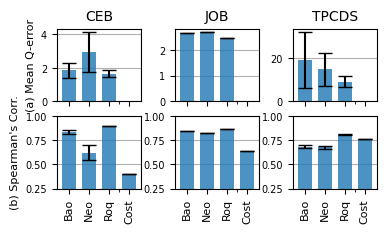

In [52]:
models = ['Bao','Neo','Roq']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(4, 2), sharey=False, sharex=True)
y = qerror_all_df[models].mean(axis=0)
yerr = qerror_all_var_df[models].mean(axis=0)
y1 = job_main_qerror_all_df[models].mean(axis=0)
yerr1 = job_main_qerror_all_var_df[models].mean(axis=0)
y2 = tpcds_qerror_all_df[models].mean(axis=0)
yerr2 = tpcds_qerror_all_var_df[models].mean(axis=0)

ax =y.plot.bar(logy=False,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0,0])
ax.set_title('CEB', fontsize=10)
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('(a) Mean Q-error',size=8)
ax.tick_params(axis='y', labelsize=7)

ax1 =y1.plot.bar(logy=False,
               yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0,1])
ax1.set_title('JOB', fontsize=10)
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.tick_params(axis='y', labelsize=7)

ax2 =y2.plot.bar(logy=False,
                yerr=yerr2.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[0,2])
ax2.set_title('TPCDS', fontsize=10)
ax2.grid(visible=True,which='both',axis='y')
ax2.set_axisbelow(True)
ax2.tick_params(axis='y', labelsize=7)

models = ['Bao','Neo','Roq','Cost']
logy=False

y = corr_all_df.loc['Spearman',models]
yerr = corr_all_var_df.loc['Spearman',models]
y1 = job_main_corr_all_df.loc['Spearman',models]
yerr1 = job_main_corr_all_var_df.loc['Spearman',models]
y2 = tpcds_corr_all_df.loc['Spearman',models]
yerr2 = tpcds_corr_all_var_df.loc['Spearman',models]

ax3 =y.plot.bar(logy=logy,
               yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1,0])
ax3.grid(visible=True,which='both',axis='y')
ax3.set_axisbelow(True)
ax3.set_ylabel('(b) Spearman\'s Corr.',size=8, )
ax3.tick_params(axis='x', rotation=90, labelsize=8)
ax3.tick_params(axis='y', labelsize=7)
ax3.set_ylim(.25,1)

ax4 =y1.plot.bar(logy=logy,
                yerr=yerr1.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1,1])
ax4.grid(visible=True,which='both',axis='y')
ax4.set_axisbelow(True)
ax4.tick_params(axis='x', rotation=90, labelsize=8)
ax4.tick_params(axis='y', labelsize=7)
ax4.set_ylim(.25,1)

ax5 =y2.plot.bar(logy=logy,
                yerr=yerr2.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7, ax=axs[1,2])
ax5.grid(visible=True,which='both',axis='y')
ax5.set_axisbelow(True)
ax5.tick_params(axis='x', rotation=90, labelsize=8)
ax5.tick_params(axis='y', labelsize=7)
ax5.set_ylim(.25,1)
# plt.text(x=-10.5,y=-1,s='(a)',fontfamily='serif')
# plt.text(x=-12,y=-.05,s='(b)',fontfamily='serif')

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.2)
# plt.show()
plt.savefig('./plots/qerr_corr_bar_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


In [53]:
cons_qerror = pd.DataFrame([job_main_qerror_all_df.mean(axis=0),job_qerror_all_df.mean(axis=0)]).T
cons_qerror_var = pd.DataFrame([job_main_qerror_all_var_df.mean(axis=0),job_qerror_all_var_df.mean(axis=0)]).T
cons_qerror.columns = ['Baseline','Workload Shift']
cons_qerror_var.columns = ['Baseline','Workload Shift']
cons_qerror

,Baseline,Workload Shift
Bao,2.670903,13.044314
Neo,2.688861,13.501683
Roq,2.445499,17.091654


In [54]:
tpcds_cons_qerror = pd.DataFrame([tpcds_ood_base_qerror_df.mean(axis=0),tpcds_ood_qerror_df.mean(axis=0)]).T
tpcds_cons_qerror_var = pd.DataFrame([tpcds_ood_base_qerror_var_df.mean(axis=0),tpcds_ood_qerror_var_df.mean(axis=0)]).T
tpcds_cons_qerror.columns = ['Baseline','Workload Shift']
tpcds_cons_qerror_var.columns = ['Baseline','Workload Shift']
tpcds_cons_qerror

,Baseline,Workload Shift
Bao,13.022554,21.944534
Neo,16.507551,15.931147
Roq,6.884149,7.229195
Roq MCDO,6.828064,7.160426


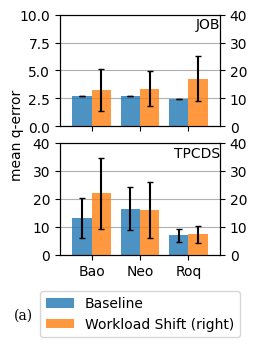

In [55]:
labels=['Bao','Neo','Roq']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(2, 3), sharex=True)

ax =cons_qerror.loc[labels].plot.bar(
    logy=False,
    yerr=cons_qerror_var.loc[labels].T.values,
    secondary_y = 'Workload Shift',
    align='center', alpha=0.8, ecolor='black',
    capsize=2.5, width=0.8, ax = axs[0],
    legend=False
    )
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylim(0,10)
ax.right_ax.set_ylim(0,40)
ax.set_title('JOB',fontsize=10,loc = 'right',y=.8)

ax1 =tpcds_cons_qerror.loc[labels].plot.bar(
    logy=False,
    yerr=tpcds_cons_qerror_var.loc[labels].T.values,
    secondary_y = 'Workload Shift',
    align='center', alpha=0.8, ecolor='black', 
    capsize=2.5, width=0.8, ax = axs[1],
    legend=False
    )
ax1.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_axisbelow(True)
ax1.set_ylim(0,40)
ax1.right_ax.set_ylim(0,40)
ax1.set_title('TPCDS',fontsize=10,loc = 'right',y=.8)

lhandles, llabels = ax1.get_legend_handles_labels()
rhandles, rlabels = ax1.right_ax.get_legend_handles_labels()
ax1.legend(lhandles+rhandles, llabels+rlabels, loc='lower center', bbox_to_anchor=(.5, -.8), ncol=1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.15)
plt.text(x=-1.6,y=-23,s='(a)',fontfamily='serif')

fig.supylabel('mean q-error',x=-.15, size=10)
plt.savefig('./plots/qerror_bar_ood_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
# plt.show()

In [56]:
cons_corr = pd.DataFrame([job_main_corr_all_df.T.Spearman,job_corr_all_df.T.Spearman]).T
cons_corr_var = pd.DataFrame([job_main_corr_all_var_df.T.Spearman,job_corr_all_var_df.T.Spearman]).T
cons_corr.columns = ['Baseline','Workload Shift']
cons_corr_var.columns = ['Baseline','Workload Shift']
cons_corr

,Baseline,Workload Shift
Cost,0.635858,0.635858
Bao,0.848870,0.301355
Neo,0.819294,0.096354
Roq,0.863826,0.322356
Roq MCDO,0.863266,0.321363


In [57]:
tpcds_cons_corr = pd.DataFrame([tpcds_ood_base_corr_df.mean(axis=0),tpcds_ood_corr_df.mean(axis=0)]).T
tpcds_cons_corr_var = pd.DataFrame([tpcds_ood_base_corr_var_df.mean(axis=0),tpcds_ood_corr_var_df.mean(axis=0)]).T
tpcds_cons_corr.columns = ['Baseline','Workload Shift']
tpcds_cons_corr_var.columns = ['Baseline','Workload Shift']
tpcds_cons_corr

,Baseline,Workload Shift
Cost,0.397361,0.397361
Bao,0.465921,0.418605
Neo,0.468199,0.421043
Roq,0.562732,0.518319
Roq MCDO,0.561019,0.518625


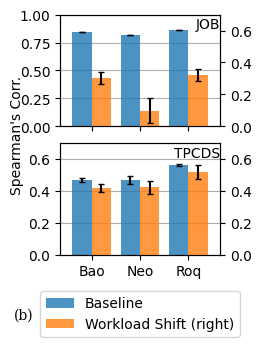

In [58]:
labels=['Bao','Neo','Roq']

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(2, 3), sharex=True)

ax =cons_corr.loc[labels].plot.bar(
    logy=False,
    yerr=cons_corr_var.loc[labels].T.values,
    secondary_y = 'Workload Shift',
    align='center', alpha=0.8, ecolor='black', 
    capsize=2.5, width=0.8, ax = axs[0],
    legend=False
    )
ax.grid(visible=True,which='both',axis='y')
ax.set_ylim(0,1)
ax.right_ax.set_ylim(0,.7)
ax.set_axisbelow(True)
ax.set_title('JOB',fontsize=10,loc = 'right',y=.8)

ax1 =tpcds_cons_corr.loc[labels].plot.bar(
    logy=False,
    yerr=tpcds_cons_corr_var.loc[labels].T.values,
    secondary_y = 'Workload Shift',
    align='center', alpha=0.8, ecolor='black', 
    capsize=2.5, width=0.8, ax = axs[1],
    legend=False
    )
ax1.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax1.grid(visible=True,which='both',axis='y')
ax1.set_ylim(0,.7)
ax1.right_ax.set_ylim(0,.7)
ax1.set_axisbelow(True)
ax1.set_title('TPCDS',fontsize=10,loc = 'right',y=.8)

lhandles, llabels = ax1.get_legend_handles_labels()
# ax1.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -.7), ncol=2)
rhandles, rlabels = ax1.right_ax.get_legend_handles_labels()
ax1.legend(lhandles+rhandles, llabels+rlabels, loc='lower center', bbox_to_anchor=(.5, -.8), ncol=1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.15)
plt.text(x=-1.6,y=-.4,s='(b)',fontfamily='serif')

fig.supylabel('Spearman\'s Corr.',x=-.15, size=10)
# legend.remove()
plt.savefig('./plots/corr_bar_ood_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()

In [147]:
runtimes_all_df,runtimes_all_var_df=collect_res(rt_res_dict)

In [179]:
job_main_runtimes_all_df,job_main_runtimes_all_var_df=collect_res(job_main_rt_res_dict)

In [148]:
job_runtimes_all_df,job_runtimes_all_var_df=collect_res(job_rt_res_dict)

In [127]:
# tpcds_runtimes_all_df,tpcds_runtimes_all_var_df=collect_res(tpcds_rt_res_dict)

NameError: name 'tpcds_rt_res_dict' is not defined

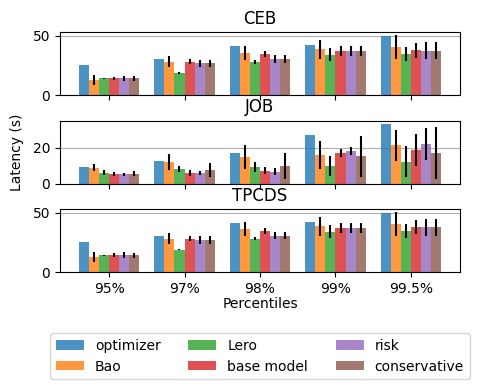

In [180]:
models = [
    'optimizer',
    'Bao', 
    # 'Neo', 
    'Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    # 'cons. prun. RN',
    # 'cons. prun. SO',
    # 'risk prun. RN',
    # 'risk prun. SO'
    ]
percentiles = [.5,.75,.85,.95,.97,.98,.99,.995]
labels = ['95%','97%','98%','99%','99.5%']
rename = {'50%':'median', '95%':'95', '99%':'99', '99.5%':'99.5'}
logy=False

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 3), sharex=True)

sub = runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub_var = runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub1 = job_main_runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub_var1 = job_main_runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
# sub2 = tpcds_runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
# sub2_var = tpcds_runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]

ax = sub.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[0], legend=False,
    yerr=sub_var,
    width=.8,
    )

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB')
# ax.set_ylim(0,65)
# ax.right_ax.set_ylabel('99th Perc. Subopt')

ax1 = sub1.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[1], legend=False,
    yerr=sub_var1,
    width=.8
    )
ax1.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB')
# ax1.set_ylim(0,65)

ax2 = sub.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[2], legend=False,
    yerr=sub_var,
    width=.8
    )
ax2.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS')
# ax2.set_ylim(0,85)

# ax2.right_ax.set_ylabel('99th Perc. Subopt')

lhandles, llabels = ax.get_legend_handles_labels()
# rhandles, rlabels = ax.right_ax.get_legend_handles_labels()
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.8), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.supylabel('Latency (s)',x=0,size=10)
fig.supxlabel('Percentiles',y=-.03,size=10)
# plt.savefig('./plots/subopt_bar_main_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

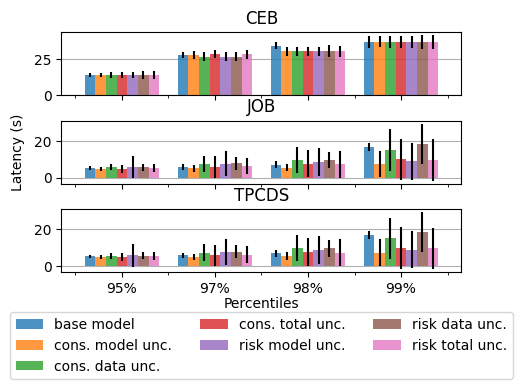

In [181]:
models = [
   'base model',
   'cons. prun. model unc. RN',
   'cons. prun. data unc. RN',
   'cons. prun. RN',
   'risk prun. model unc. RN', 
   'risk prun. data unc. RN', 
   'risk prun. RN', 
   ]

chart_labels = [
   'base model',
   'cons. model unc.',
   'cons. data unc.',
   'cons. total unc.',
   'risk model unc.',
   'risk data unc.',
   'risk total unc.',
   ]
percentiles = [.5,.75,.85,.95,.97,.98,.99]
labels = ['95%','97%','98%','99%']
rename = {'50%':'median', '95%':'95th', '99%':'99th'}
logy=False

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 3), sharex=True)

sub = runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub_var = runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub1 = job_main_runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
sub_var1 = job_main_runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
# sub2 = tpcds_runtimes_all_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]
# sub2_var = tpcds_runtimes_all_var_df.loc[:,models].describe(percentiles = percentiles).loc[labels,:]

ax = sub.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[0], legend=False,
    yerr=sub_var,
    width=.8,
    )

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB')
# ax.set_ylim(0,65)
# ax.right_ax.set_ylabel('99th Perc. Subopt')

ax1 = sub1.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[1], legend=False,
    yerr=sub_var1,
    width=.8
    )
ax1.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB')
# ax1.set_ylim(0,65)

ax2 = sub1.plot.bar(
    align='center', alpha=0.8,
    logy=logy,
    ax = axs[2], legend=False,
    yerr=sub_var1,
    width=.8
    )
ax2.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=0,ha='center')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS')
# ax2.set_ylim(0,85)

# ax2.right_ax.set_ylabel('99th Perc. Subopt')

lhandles, llabels = ax.get_legend_handles_labels()
# rhandles, rlabels = ax.right_ax.get_legend_handles_labels()
ax2.legend(lhandles, chart_labels, loc='lower center', bbox_to_anchor=(.5, -1.8), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.supylabel('Latency (s)',x=0,size=10)
fig.supxlabel('Percentiles',y=-.03,size=10)
# plt.savefig('./plots/subopt_bar_main_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

In [151]:
subopts_all_df,subopts_all_var_df=collect_res(so_res_dict)

In [66]:
tpcds_subopts_all_df,tpcds_subopts_all_var_df=collect_res(tpcds_so_res_dict)

In [152]:
agg_res_all_df,agg_res_all_var_df=collect_res(agg_res_dict)

In [153]:
job_agg_res_all_df,job_agg_res_all_var_df=collect_res(job_agg_res_dict)

In [182]:
job_main_agg_res_all_df,job_main_agg_res_all_var_df=collect_res(job_main_agg_res_dict)

In [70]:
# tpcds_agg_res_all_df,tpcds_agg_res_all_var_df=collect_res(tpcds_agg_res_dict)

In [185]:
job_main_agg_res_all_df

,improved,improved_runtime,average_improvement,regressed,regressed_runtime,average_regression,unchanged,total_runtime_change%,total_runtime_change,average_runtime_change,total_subopt,mean,50%,60%,70%,80%,90%,95%,99%,max
Bao,0.311504,115.968542,3.306728,0.472566,105.516847,1.973404,0.215929,-0.030959,-10.451696,-0.092493,0.969041,3.393429,1.158442,1.255728,1.391449,1.655366,2.458224,7.212183,19.303338,173.511869
Lero,0.136283,99.982968,6.498172,0.111504,15.121969,1.296271,0.752212,-0.251369,-84.860998,-0.750982,0.748631,1.344926,1.070446,1.130151,1.253889,1.458027,1.925157,2.676571,3.943017,5.733295
Neo,0.315044,129.506560,3.715451,0.421239,45.833984,0.942981,0.263717,-0.247849,-83.672577,-0.740465,0.752151,2.161177,1.148659,1.244616,1.370317,1.639344,1.927750,2.564235,5.780062,88.645750
base model,0.299115,123.414543,3.681177,0.334513,51.076822,1.372878,0.366372,-0.214274,-72.337721,-0.640157,0.785726,3.197761,1.124478,1.205990,1.322566,1.533111,1.917806,2.602757,6.164649,209.795733
base model pruned,0.320354,125.434322,3.524416,0.463717,86.498226,1.667680,0.215929,-0.115334,-38.936095,-0.344567,0.884666,2.049642,1.205488,1.303524,1.483792,1.781576,2.360783,3.976293,9.713572,52.634472
best,0.787611,156.930881,1.763268,0.000000,0.000000,0.000000,0.212389,-0.464850,-156.930881,-1.388769,0.535150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cons. data unc.,0.415929,123.985945,2.640379,0.449558,56.296607,1.106754,0.134513,-0.200505,-67.689338,-0.599021,0.799495,2.825084,1.119723,1.182966,1.311660,1.450946,1.861629,2.499632,7.193680,168.874676
cons. model unc.,0.394690,125.416168,2.830243,0.446018,49.725370,0.985765,0.159292,-0.224206,-75.690799,-0.669830,0.775794,2.810730,1.117795,1.180800,1.288274,1.444694,1.854936,2.433777,6.192508,168.743752
cons. prun. RN,0.410619,125.063556,2.702273,0.460177,49.544418,0.952106,0.129204,-0.223698,-75.519138,-0.668311,0.776302,1.849572,1.141141,1.224792,1.357301,1.526602,1.875159,2.364877,7.942259,53.678792
cons. prun. SO,0.417699,124.835522,2.646477,0.456637,56.758757,1.100283,0.125664,-0.201652,-68.076765,-0.602449,0.798348,2.217811,1.134840,1.217957,1.334432,1.499884,1.896948,2.570302,9.729012,91.803461


KeyError: "['median', '95th', '99th'] not in index"

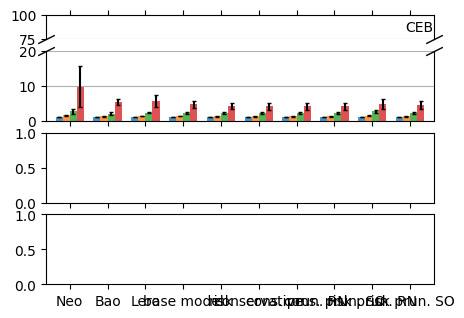

In [184]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]

rename = {'50%':'median', '95%':'95th', '99%':'99th'}
data_points = ['median','mean','95th','99th']
logy=False

sub = agg_res_all_df.loc[labels,:].copy()
sub_var = agg_res_all_var_df.loc[labels,:].copy()
sub.rename(rename,axis=1,inplace=True)
sub_var.rename(rename,axis=1,inplace=True)

sub1 = job_main_agg_res_all_df.loc[labels,:].copy()
sub_var1 = job_main_agg_res_all_var_df.loc[labels,:].copy()
# sub1.rename(rename,axis=1,inplace=True)
# sub_var1.rename(rename,axis=1,inplace=True)

# sub2 = tpcds_agg_res_all_df.loc[labels,:].copy()
# sub_var2 = tpcds_agg_res_all_var_df.loc[labels,:].copy()
# sub2.rename(rename,axis=1,inplace=True)
# sub_var2.rename(rename,axis=1,inplace=True)


height_ratios = [0.7,2,2,2]
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 3.5), sharex=True,gridspec_kw={'height_ratios':height_ratios})

ax=sub.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[0],
    legend=False
    )

ax1=sub.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[1],
    legend=False
    )

ax.grid(visible=True,which='major',axis='y')
ax1.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB',fontsize=10,loc='right',y=0)

ax.set_ylim(75, 100)  # outliers only
ax1.set_ylim(0, 20)  # most of the data

# hide the spines between ax and ax2
ax.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

ax2=sub1.loc[labels,data_points].plot.bar(
    logy=logy, 
    # secondary_y=['99th'],
    yerr=sub_var1.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[2],
    legend=False
    )
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('JOB',fontsize=10,loc='right',y=.7)


ax3=sub.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[3],
    legend=False
    )
ax3.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax3.grid(visible=True,which='major',axis='y')
ax3.set_axisbelow(True)
ax3.set_title('TPCDS',fontsize=10,loc='right',y=.7)

lhandles, llabels = ax3.get_legend_handles_labels()
ax3.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.4), ncol=4)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
# plt.text(x=-1.4,y=-180,s='(a)',fontfamily='serif')
# plt.tight_layout()
fig.supylabel('Suboptimality',x=0,size=10)

plt.savefig('./plots/subopt_bar_main_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()

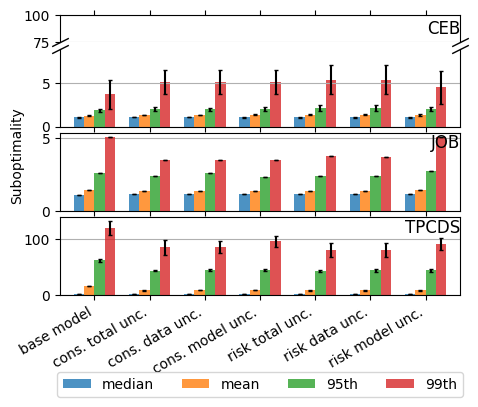

In [72]:
labels = [
    'base model',
    'cons. prun. SO',
    'cons. prun. data unc. SO',
    'cons. prun. model unc. SO',
    'risk prun. SO', 
    'risk prun. data unc. SO', 
    'risk prun. model unc. SO', 
    ]

chart_labels = [
    'base model',
    'cons. total unc.','cons. data unc.','cons. model unc.',
    'risk total unc.','risk data unc.','risk model unc.'
    ]

rename = {'50%':'median', '95%':'95th', '99%':'99th'}
data_points = ['median','mean','95th','99th']
logy=False

sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]
sub.rename(rename,axis=1,inplace=True)
sub_var.rename(rename,axis=1,inplace=True)

sub1 = job_main_agg_res_all_df.loc[labels,:]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,:]
sub1.rename(rename,axis=1,inplace=True)
sub_var1.rename(rename,axis=1,inplace=True)

sub2 = tpcds_agg_res_all_df.loc[labels,:]
sub_var2 = tpcds_agg_res_all_var_df.loc[labels,:]
sub2.rename(rename,axis=1,inplace=True)
sub_var2.rename(rename,axis=1,inplace=True)


height_ratios = [0.7,2,2,2]
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 3.5), sharex=True,gridspec_kw={'height_ratios':height_ratios})

ax=sub.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[0],
    legend=False
    )

ax1=sub.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[1],
    legend=False
    )

ax.grid(visible=True,which='major',axis='y')
ax1.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB',loc='right',y=0)

ax.set_ylim(75, 100)  # outliers only
ax1.set_ylim(0, 9)  # most of the data

# hide the spines between ax and ax2
ax.spines.bottom.set_visible(False)
ax1.spines.top.set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax1.xaxis.tick_bottom()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
ax1.plot([0, 1], [1, 1], transform=ax1.transAxes, **kwargs)

ax2=sub1.loc[labels,data_points].plot.bar(
    logy=logy, 
    # secondary_y=['99th'],
    yerr=sub_var1.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[2],
    legend=False
    )
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('JOB',loc='right',y=.7)


ax3=sub2.loc[labels,data_points].plot.bar(
    logy=logy,
    # secondary_y=['99th'],
    yerr=sub_var2.loc[labels,data_points],
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,ax=axs[3],
    legend=False
    )
ax3.set_xticks(ticks=np.arange(len(chart_labels)),labels=chart_labels,rotation=30,ha='right')
ax3.grid(visible=True,which='major',axis='y')
ax3.set_axisbelow(True)
ax3.set_title('TPCDS',loc='right',y=.7)

lhandles, llabels = ax3.get_legend_handles_labels()
ax3.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.4), ncol=4)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
# plt.tight_layout()
fig.supylabel('Suboptimality',x=0,size=10)

plt.savefig('./plots/subopt_bar_mode_data_unc_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()

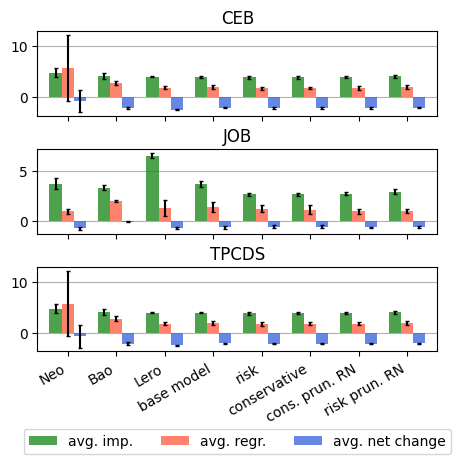

In [186]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    'cons. prun. RN',
    # 'cons. prun. SO',
    'risk prun. RN',
    # 'risk prun. SO'
    ]

features = ["average_improvement","average_regression","average_runtime_change"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]

sub1 = job_main_agg_res_all_df.loc[labels,features]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,features]

# sub2 = tpcds_agg_res_all_df.loc[labels,features]
# sub_var2 = tpcds_agg_res_all_var_df.loc[labels,features]

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 4), sharex=True)


ax = sub.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5,width=0.75, legend = False, ax = axs[0])
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB')

ax1 = sub1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var1.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5,width=0.75, legend = False, ax = axs[1])
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB')

ax2 = sub.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5,width=0.75, legend = False, ax = axs[2])
ax2.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS')

lhandles, llabels = ax2.get_legend_handles_labels()
llabels = ["avg. imp.", "avg. regr.", 'avg. net change']
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.3), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [74]:
# labels = [
#     'optimizer',
#     'Neo','Bao',
#     'base model',
#     # 'mc dropout',
#     'risk',
#     'conservative',
#     'cons. prun. RN',
#     'cons. prun. SO',
#     'risk prun. RN',
#     'risk prun. SO'
#     ]
# features = ["improved_runtime","regressed_runtime","total_runtime_change%","mean","50%","95%","99%"]
# sub = agg_res_all_df.loc[labels,features]
# sub_perc = sub.copy()
# sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
# sub_perc.columns = ['improved%','regressed%','net change']

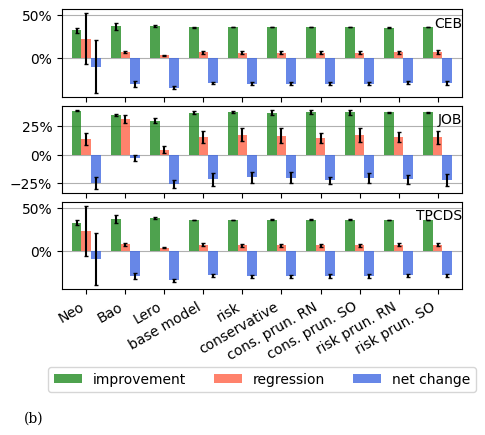

In [187]:
import matplotlib.ticker as mtick

labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub1 = job_main_agg_res_all_df.loc[labels,features]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,features]
sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100

# sub2 = tpcds_agg_res_all_df.loc[labels,features]
# sub_var2 = tpcds_agg_res_all_var_df.loc[labels,features]
# sub_perc2 = sub2.copy()
# sub_var_perc2=sub_var2.copy()
# sub_perc2[["improved_runtime","regressed_runtime"]] = sub_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_var_perc2[["improved_runtime","regressed_runtime"]] = sub_var_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_perc2=sub_perc2*100
# sub_var_perc2=sub_var_perc2*100


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 3.5), sharex=True)

ax = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[0])

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB',fontsize=10,loc='right',y=.7)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('%')

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[1])

ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB',fontsize=10,loc='right',y=.7)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())

# ax1.set_ylabel('%')

ax2 = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[2])
ax2.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS',fontsize=10,loc='right',y=.7)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax2.set_ylabel('%')

lhandles, llabels = ax2.get_legend_handles_labels()
llabels = ["improvement","regression","net change"]
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.25), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
plt.text(x=-1.6,y=-200,s='(b)',fontfamily='serif')
# plt.show()
plt.savefig('./plots/runtime_bar_main_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


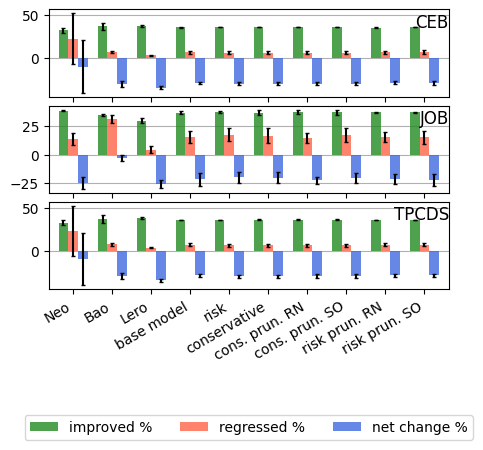

In [190]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]

chart_labels = labels
features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]
sub.index=chart_labels
sub_var.index=chart_labels
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub1 = job_main_agg_res_all_df.loc[labels,features]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,features]
sub1.index=chart_labels
sub_var1.index=chart_labels
# sub1 = sub1.sort_values(by='total_runtime_change%',ascending=False)
sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100

# sub2 = tpcds_agg_res_all_df.loc[labels,features]
# sub_var2 = tpcds_agg_res_all_var_df.loc[labels,features]
# sub2.index=chart_labels
# sub_var2.index=chart_labels
# # sub2 = sub2.sort_values(by='total_runtime_change%',ascending=False)
# sub_perc2 = sub2.copy()
# sub_var_perc2=sub_var2.copy()
# sub_perc2[["improved_runtime","regressed_runtime"]] = sub_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_var_perc2[["improved_runtime","regressed_runtime"]] = sub_var_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_perc2=sub_perc2*100
# sub_var_perc2=sub_var_perc2*100


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 3.5), sharex=True)

ax = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[0])

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB',loc='right',y=.7)
# ax.set_ylabel('%')

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[1])

ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB',loc='right',y=.7)
# ax1.set_ylabel('%')

ax2 = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[2])
ax2.set_xticks(ticks=np.arange(len(sub_perc.index)),
               labels=sub_perc.index,
               rotation=30,ha='right')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS',loc='right',y=.7)
# ax2.set_ylabel('%')

lhandles, llabels = ax2.get_legend_handles_labels()
llabels = ["improved %","regressed %","net change %"]
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.8), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
# plt.show()
plt.savefig('./plots/runtime_bar_mode_data_unc_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


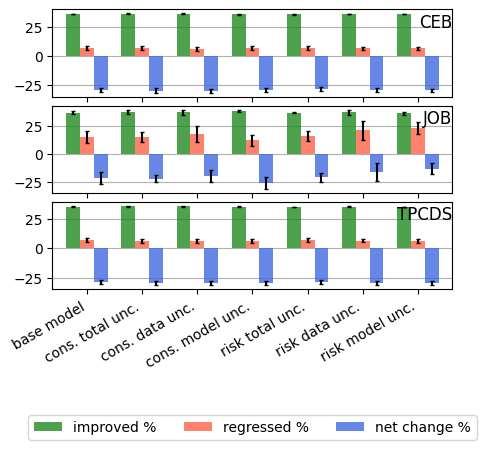

In [ ]:
labels = [
   'base model',
   'cons. prun. RN',
   'cons. prun. data unc. RN',
   'cons. prun. model unc. RN',
   'risk prun. RN', 
   'risk prun. data unc. RN', 
   'risk prun. model unc. RN', 
   ]

chart_labels = [
   'base model',
   'cons. total unc.','cons. data unc.','cons. model unc.',
   'risk total unc.','risk data unc.','risk model unc.'
   ]
features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]
sub.index=chart_labels
sub_var.index=chart_labels
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub1 = job_main_agg_res_all_df.loc[labels,features]
sub_var1 = job_main_agg_res_all_var_df.loc[labels,features]
sub1.index=chart_labels
sub_var1.index=chart_labels
# sub1 = sub1.sort_values(by='total_runtime_change%',ascending=False)
sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100

# sub2 = tpcds_agg_res_all_df.loc[labels,features]
# sub_var2 = tpcds_agg_res_all_var_df.loc[labels,features]
# sub2.index=chart_labels
# sub_var2.index=chart_labels
# # sub2 = sub2.sort_values(by='total_runtime_change%',ascending=False)
# sub_perc2 = sub2.copy()
# sub_var_perc2=sub_var2.copy()
# sub_perc2[["improved_runtime","regressed_runtime"]] = sub_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_var_perc2[["improved_runtime","regressed_runtime"]] = sub_var_perc2[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
# sub_perc2=sub_perc2*100
# sub_var_perc2=sub_var_perc2*100


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5, 3.5), sharex=True)

ax = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[0])

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('CEB',loc='right',y=.7)
# ax.set_ylabel('%')

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[1])

ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB',loc='right',y=.7)
# ax1.set_ylabel('%')

ax2 = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[2])
ax2.set_xticks(ticks=np.arange(len(sub_perc.index)),
               labels=sub_perc.index,
               rotation=30,ha='right')
ax2.grid(visible=True,which='major',axis='y')
ax2.set_axisbelow(True)
ax2.set_title('TPCDS',loc='right',y=.7)
# ax2.set_ylabel('%')

lhandles, llabels = ax2.get_legend_handles_labels()
llabels = ["improved %","regressed %","net change %"]
ax2.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.8), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.1)
# plt.show()
plt.savefig('./plots/runtime_bar_mode_data_unc_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)


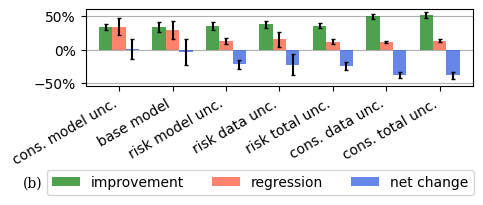

In [77]:
labels = [
   'base model',
   'cons. prun. model unc. RN',
   'cons. prun. data unc. RN',
   'cons. prun. RN',
   'risk prun. model unc. RN', 
   'risk prun. data unc. RN', 
   'risk prun. RN', 
   ]

chart_labels = [
   'base model',
   'cons. model unc.',
   'cons. data unc.',
   'cons. total unc.',
   'risk model unc.',
   'risk data unc.',
   'risk total unc.',
   ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = tpcds_agg_res_all_df.loc[labels,features]
sub_var = tpcds_agg_res_all_var_df.loc[labels,features]

sub.index=chart_labels
sub_var.index=chart_labels

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc = sub.copy()
sub_var_perc = sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/tpcds_runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub_perc.plot.bar(logy=False,figsize=[5,1],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=.75)
plt.xticks(rotation=30,ha='right')
ax.grid(visible=True,which='both',axis='y')
ax.set_ylim((-55,60))
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

lhandles, llabels = ax.get_legend_handles_labels()
llabels = ["improvement","regression","net change"]
ax.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.45, -1.5), ncol=3)
plt.text(x=-1.8,y=-205,s='(b)',fontfamily='serif')

# plt.show()
plt.savefig('./plots/tpcds_runtime_bar_mode_data_unc_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)

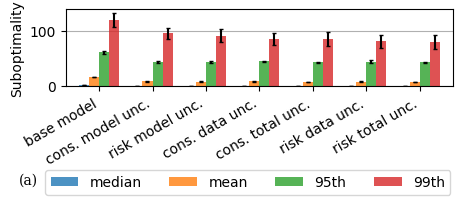

In [78]:
labels = [
   'base model',
   'cons. prun. model unc. SO',
   'cons. prun. data unc. SO',
   'cons. prun. SO',
   'risk prun. model unc. SO', 
   'risk prun. data unc. SO', 
   'risk prun. SO', 
   ]

chart_labels = [
   'base model',
   'cons. model unc.',
   'cons. data unc.',
   'cons. total unc.',
   'risk model unc.',
   'risk data unc.',
   'risk total unc.',
   ]

rename = {'50%':'median', '95%':'95th', '99%':'99th'}
data_points = ['median','mean','95th','99th']
logy=False

sub = tpcds_agg_res_all_df.rename(rename,axis=1).loc[labels,data_points]
sub_var = tpcds_agg_res_all_var_df.rename(rename,axis=1).loc[labels,data_points]
# sub.rename(rename,axis=1,inplace=True)
# sub_var.rename(rename,axis=1,inplace=True)
sub.index=chart_labels
sub_var.index=chart_labels
sub = sub.sort_values(by='99th',ascending=False)

# height_ratios = [0.7,2,2,2]
# fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 3.5), sharex=True,gridspec_kw={'height_ratios':height_ratios})

ax=sub.plot.bar(
    logy=logy, figsize=(5,1),
    # secondary_y=['99th'],
    yerr=sub_var,
    align='center', alpha=0.8, ecolor='black', 
    capsize=1.5, width=0.75,
    legend=False
    )

ax.set_xticks(ticks=np.arange(len(sub.index)),labels=sub.index,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# ax.set_title('TPCDS',x=.85,y=.7)
ax.set_ylabel('Suboptimality')

lhandles, llabels = ax3.get_legend_handles_labels()
ax.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.47, -1.5), ncol=4)
plt.text(x=-1.5,y=-175,s='(a)',fontfamily='serif')

plt.savefig('./plots/tpcds_subopt_bar_mode_data_unc_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()

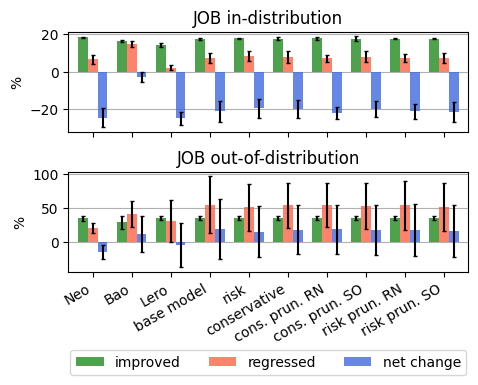

In [191]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]

chart_labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = job_main_agg_res_all_df.loc[labels,features]
sub_var = job_main_agg_res_all_var_df.loc[labels,features]
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100
sub_perc.index=chart_labels
sub_var_perc.index=chart_labels

sub1 = job_agg_res_all_df.loc[labels,features]
sub_var1 = job_agg_res_all_var_df.loc[labels,features]
sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100
sub_perc1.index=chart_labels
sub_var_perc1.index=chart_labels


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(5, 3), sharex=True)

ax = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[0])

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('JOB in-distribution')
ax.set_ylabel('%')

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[1])
ax1.set_xticks(ticks=np.arange(len(sub_perc.index)),labels=sub_perc.index,rotation=30,ha='right')
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB out-of-distribution')
ax1.set_ylabel('%')

lhandles, llabels = ax1.get_legend_handles_labels()
llabels = ["improved","regressed","net change"]
ax1.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(.5, -1.1), ncol=3)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

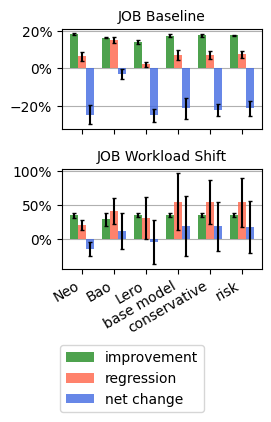

In [192]:
labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
   #  'conservative',
   #  'risk',
    'cons. prun. RN',
   #  'cons. prun. SO',
    'risk prun. RN',
   #  'risk prun. SO'
    ]

chart_labels = [
    # 'optimizer',
    'Neo','Bao','Lero',
    'base model',
    # 'mc dropout',
    'conservative',
    'risk',
   #  'cons. prun. RN',
   #  'cons. prun. SO',
   #  'risk prun. RN',
   #  'risk prun. SO'
    ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = job_main_agg_res_all_df.loc[labels,features]
sub_var = job_main_agg_res_all_var_df.loc[labels,features]
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100
sub_perc.index=chart_labels
sub_var_perc.index=chart_labels

sub1 = job_agg_res_all_df.loc[labels,features]
sub_var1 = job_agg_res_all_var_df.loc[labels,features]
sub_perc1 = sub1.copy()
sub_var_perc1=sub_var1.copy()
sub_perc1[["improved_runtime","regressed_runtime"]] = sub_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_var_perc1[["improved_runtime","regressed_runtime"]] = sub_var_perc1[["improved_runtime","regressed_runtime"]]/job_main_runtimes_all_df.optimizer.sum()
sub_perc1=sub_perc1*100
sub_var_perc1=sub_var_perc1*100
sub_perc1.index=chart_labels
sub_var_perc1.index=chart_labels


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(2.5, 3), sharex=True)

ax = sub_perc.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[0])

ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_title('JOB Baseline',fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylabel('%')

ax1 = sub_perc1.plot.bar(logy=False,
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc1,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75,legend = False, ax = axs[1])
ax1.set_xticks(ticks=np.arange(len(sub_perc.index)),labels=sub_perc.index,rotation=30,ha='right')
ax1.grid(visible=True,which='major',axis='y')
ax1.set_axisbelow(True)
ax1.set_title('JOB Workload Shift',fontsize=10)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
# ax1.set_ylabel('%')

lhandles, llabels = ax1.get_legend_handles_labels()
llabels = ["improvement","regression","net change"]
ax1.legend(lhandles, llabels, loc='lower center', bbox_to_anchor=(0.35, -1.5), ncol=1)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.savefig('./plots/job_runtime_bar_wlshift_{}.png'.format(plots_id),bbox_inches='tight',dpi=300)
plt.show()

In [81]:
labels=['Bao','Neo','base model','risk','conservative']#,'risk prun. RN','cons. prun. RN','risk prun. SO','cons. prun. SO']
columns = ['improved','regressed']#,'total_runtime_change%']
ood_rt = job_agg_res_all_df.loc[labels,columns]
base_rt = job_main_agg_res_all_df.loc[labels,columns]
ood_rt_var = job_agg_res_all_var_df.loc[labels,columns]
base_rt_var = job_main_agg_res_all_var_df.loc[labels,columns]

columns = ['mean','50%']
ood_so = job_agg_res_all_df.loc[labels,columns]
base_so = job_main_agg_res_all_df.loc[labels,columns]
ood_so_var = job_agg_res_all_var_df.loc[labels,columns]
base_so_var = job_main_agg_res_all_var_df.loc[labels,columns]
ood_so.columns=['mean','median']
base_so.columns=['mean','median']
ood_so_var.columns=['mean','median']
base_so_var.columns=['mean','median']

In [82]:
so_res = pd.concat([base_so,ood_so], axis=1, join="inner",keys=["Baseline", "OOD"])
so_res_var = pd.concat([base_so_var,ood_so_var], axis=1, join="inner",keys=["Baseline", "OOD"])
so_res=so_res.reorder_levels([1,0],axis=1)
so_res=so_res[so_res.columns[[0,2,1,3]]]
so_res_var=so_res_var.reorder_levels([1,0],axis=1)
so_res_var=so_res_var[so_res_var.columns[[0,2,1,3]]]
so_res

mean              median          
              Baseline       OOD  Baseline       OOD
Bao           3.213728  2.550980  1.093071  1.329965
Neo           3.177549  3.975710  1.093071  1.480638
base model    1.405398  2.010920  1.113209  1.239296
risk          1.278925  1.815006  1.114323  1.229587
conservative  1.311975  1.846596  1.122033  1.233019

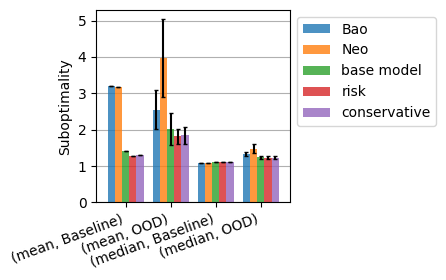

In [83]:
import matplotlib.pyplot as plt
plot_name = './plots/wl_shift_so_bar_job_{}.png'.format(plots_id)

ax = so_res.T.plot.bar(figsize=[2.5,2.5], 
                       yerr=so_res_var.T,
                  align='center', alpha=0.8, ecolor='black', capsize=1.5,
                  width=0.8)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=20,ha='right')
plt.ylabel('Suboptimality')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
if plot_name is not None:
    plt.savefig(plot_name,bbox_inches='tight',dpi=300)

In [84]:
rt_res = pd.concat([base_rt,ood_rt], axis=1, join="inner",keys=["Baseline", "OOD"])
rt_res_var = pd.concat([base_rt_var,ood_rt_var], axis=1, join="inner",keys=["Baseline", "OOD"])
# df.columns=['baseline improved','baseline regressed',
#             'OOD improved', 'OOD regressed']
rt_res*100



Baseline                   OOD           
               improved  regressed   improved  regressed
Bao           30.973451  36.283186  25.221239  60.176991
Neo           28.318584  38.938053  22.787611  63.938053
base model    25.663717  30.088496  28.318584  60.398230
risk          38.053097  43.362832  34.734513  56.194690
conservative  36.283186  46.017699  33.407080  57.300885

In [85]:
rt_res=rt_res.reorder_levels([1,0],axis=1)
rt_res=rt_res[rt_res.columns[[0,2,1,3]]]
rt_res_var=rt_res_var.reorder_levels([1,0],axis=1)
rt_res_var=rt_res_var[rt_res_var.columns[[0,2,1,3]]]

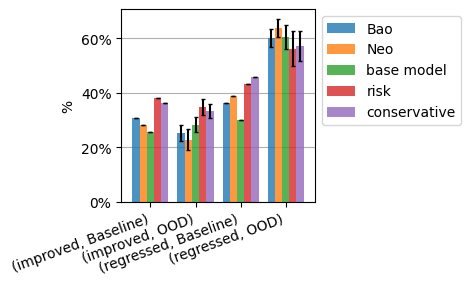

In [86]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plot_name = './plots/wl_shift_runtime_bar_job_{}.png'.format(plots_id)


ax = rt_res.T.plot.bar(figsize=[2.5,2.5], 
                       yerr=rt_res_var.T,
                  align='center', alpha=0.8, ecolor='black', capsize=1.5,
                  width=0.8)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=20,ha='right')
plt.ylabel('%')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
# plt.show()
if plot_name is not None:
    plt.savefig(plot_name,bbox_inches='tight',dpi=300)

In [85]:
labels = [
        # 'optimizer pruned',
        'Neo','Bao','Lero',
        # 'Neo+','Bao+',
        'base model',#'base model pruned',
        # 'mc dropout','mc dropout pruned',
        'conservative','cons. prun. RN','cons. prun. SO',
        'risk','risk prun. RN','risk prun. SO',
        ]
columns =['improved_runtime','regressed_runtime','total_runtime_change%',
          'mean','50%','70%','90%','95%','99%'
          ]
sub = agg_res_all_df.loc[labels,columns].sort_values(by='total_runtime_change%')
sub[['improved_runtime','regressed_runtime']]=sub[['improved_runtime','regressed_runtime']]/runtimes_all_df.optimizer.sum()
sub

,improved_runtime,regressed_runtime,total_runtime_change%,mean,50%,70%,90%,95%,99%
Lero,0.396304,0.028822,-0.367483,1.415805,1.038689,1.110914,1.618223,2.459906,6.921155
Bao,0.369626,0.072247,-0.297378,1.343139,1.044862,1.138866,1.586129,2.061433,5.352139
base model,0.355059,0.072055,-0.283004,1.343252,1.052887,1.177865,1.711195,2.344174,5.146241
conservative,0.352696,0.074843,-0.277853,1.347339,1.067059,1.230529,1.706435,2.544127,5.368764
cons. prun. SO,0.352170,0.075940,-0.276230,1.445821,1.075574,1.251304,1.732972,2.645755,5.510038
cons. prun. RN,0.350094,0.075205,-0.274890,1.452993,1.072760,1.250277,1.748919,2.707631,5.844090
risk prun. RN,0.352792,0.078242,-0.274550,1.379147,1.074517,1.249204,1.735675,2.718006,5.383431
risk prun. SO,0.349905,0.076707,-0.273198,1.358174,1.071412,1.239424,1.723339,2.581236,5.374442
risk,0.347544,0.077623,-0.269921,1.368094,1.078358,1.242749,1.716433,2.598468,5.384505
Neo,0.325989,0.227141,-0.098848,1.618005,1.097685,1.310858,1.876567,2.730679,9.853034


In [86]:
sub = job_main_agg_res_all_df.loc[labels,columns].sort_values(by='total_runtime_change%')
sub[['improved_runtime','regressed_runtime']]=sub[['improved_runtime','regressed_runtime']]/job_main_runtimes_all_df.optimizer.sum()
sub

NameError: name 'job_main_agg_res_all_df' is not defined

In [89]:
sub = tpcds_agg_res_all_df.loc[labels,columns].sort_values(by='total_runtime_change%')
sub[['improved_runtime','regressed_runtime']]=sub[['improved_runtime','regressed_runtime']]/job_main_runtimes_all_df.optimizer.sum()
sub

,improved_runtime,regressed_runtime,total_runtime_change%,mean,50%,70%,90%,95%,99%
conservative,0.219296,0.050391,-0.411317,8.901580,1.234448,2.025218,30.529153,44.812065,89.028706
cons. prun. RN,0.212620,0.054629,-0.384741,9.752757,1.243377,2.111784,32.070911,45.576445,100.901573
cons. prun. SO,0.191225,0.069614,-0.296146,8.452648,1.215102,1.967967,30.376930,43.432053,84.696061
risk prun. RN,0.147434,0.047786,-0.242662,10.690744,1.259655,2.527532,34.555499,48.699356,111.444325
risk prun. SO,0.148688,0.077266,-0.173926,8.267151,1.202176,1.960588,30.615599,42.929952,80.219551
risk,0.140670,0.112211,-0.069304,8.794206,1.221277,2.092710,31.795496,44.365654,89.864103
base model,0.137658,0.120933,-0.040727,16.499511,2.300703,20.956202,45.877301,61.605076,118.951975
Bao,0.151907,0.162381,0.025507,19.603457,4.433058,26.157453,50.452275,71.663379,135.011990
Neo,0.181548,0.192316,0.026221,19.418206,2.787224,24.908220,52.529085,73.846811,133.564525


In [91]:
labels = [
    'optimizer',
    'Neo','Bao','Lero',
    'base model',
    'risk',
    'conservative',
    'cons. prun. RN',
    'cons. prun. SO',
    'risk prun. RN',
    'risk prun. SO'
    ]
data_points = ['50%','mean','95%','99%']
rn_data_points = ['improved_runtime','regressed_runtime','total_runtime_change%']
df = agg_res_all_df.loc[labels,data_points]
df.sort_values(by='mean')

,50%,mean,95%,99%
Bao,1.044862,1.343139,2.061433,5.352139
base model,1.052887,1.343252,2.344174,5.146241
conservative,1.067059,1.347339,2.544127,5.368764
risk prun. SO,1.071412,1.358174,2.581236,5.374442
risk,1.078358,1.368094,2.598468,5.384505
risk prun. RN,1.074517,1.379147,2.718006,5.383431
Lero,1.038689,1.415805,2.459906,6.921155
cons. prun. SO,1.075574,1.445821,2.645755,5.510038
cons. prun. RN,1.072760,1.452993,2.707631,5.844090
Neo,1.097685,1.618005,2.730679,9.853034


In [92]:
ceb_so_opt = (df-df.loc['optimizer',:])/df.loc['optimizer',:]
ceb_so_opt


,50%,mean,95%,99%
optimizer,0.000000,0.000000,0.000000,0.000000
Neo,-0.108813,-0.786026,-0.731044,-0.910846
Bao,-0.151699,-0.822376,-0.796960,-0.951572
Lero,-0.156711,-0.812766,-0.757713,-0.937375
base model,-0.145184,-0.822361,-0.769112,-0.953435
risk,-0.124504,-0.819076,-0.744066,-0.951279
conservative,-0.133678,-0.821821,-0.749418,-0.951422
cons. prun. RN,-0.129049,-0.807849,-0.733314,-0.947121
cons. prun. SO,-0.126764,-0.808797,-0.739408,-0.950143
risk prun. RN,-0.127623,-0.817614,-0.732292,-0.951289


In [93]:
ceb_so_ml = (df-df.loc[['Neo','Bao'],:].min())/df.loc[['Neo','Bao'],:].min()
ceb_so_ml


,50%,mean,95%,99%
optimizer,0.178827,4.629874,3.925150,19.649236
Neo,0.050556,0.204644,0.324650,0.840952
Bao,0.000000,0.000000,0.000000,0.000000
Lero,-0.005908,0.054101,0.193299,0.293157
base model,0.007681,0.000084,0.137157,-0.038470
risk,0.032058,0.018579,0.260515,0.006047
conservative,0.021244,0.003127,0.234154,0.003106
cons. prun. RN,0.026700,0.081789,0.313470,0.091917
cons. prun. SO,0.029394,0.076449,0.283454,0.029502
risk prun. RN,0.028382,0.026808,0.318503,0.005847


In [94]:

df = agg_res_all_df.loc[labels,rn_data_points]
df

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,228.263834,159.048576,-0.098848
Bao,258.818627,50.588962,-0.297378
Lero,277.499467,20.181377,-0.367483
base model,248.618849,50.454405,-0.283004
risk,243.356535,54.353102,-0.269921
conservative,246.964232,52.406748,-0.277853
cons. prun. RN,245.142406,52.659614,-0.274890
cons. prun. SO,246.595775,53.174778,-0.276230
risk prun. RN,247.031524,54.786529,-0.274550


In [95]:
ceb_rn_ml = (df-df.loc[['Neo','Bao'],:].min())#/df.loc[['Neo','Bao'],:].min()
ceb_rn_ml

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,0.000000,108.459614,0.198530
Bao,30.554793,0.000000,0.000000
Lero,49.235633,-30.407585,-0.070104
base model,20.355015,-0.134556,0.014374
risk,15.092701,3.764140,0.027457
conservative,18.700398,1.817786,0.019526
cons. prun. RN,16.878572,2.070652,0.022489
cons. prun. SO,18.331941,2.585816,0.021149
risk prun. RN,18.767691,4.197567,0.022828


In [95]:
df = job_main_agg_res_all_df.loc[labels,data_points]
job_so_opt = (df-df.loc['optimizer',:])/df.loc['optimizer',:]
job_so_opt

,50%,mean,95%,99%
optimizer,0.000000,0.000000,0.000000,0.000000
Neo,0.015698,0.839309,-0.530896,-0.090044
Bao,0.015698,0.860251,-0.385328,-0.176073
base model,0.034411,-0.186492,-0.364802,-0.550086
risk,0.035447,-0.259700,-0.498224,-0.705661
conservative,0.042611,-0.240569,-0.439511,-0.705661
cons. prun. RN,0.049633,-0.221352,-0.430129,-0.690451
cons. prun. SO,0.057399,-0.215148,-0.430129,-0.690451
risk prun. RN,0.055072,-0.190586,-0.364949,-0.546843
risk prun. SO,0.064960,-0.202107,-0.430129,-0.663990


In [96]:
job_so_ml = (df-df.loc[['Neo','Bao'],:].min())/df.loc[['Neo','Bao'],:].min()
job_so_ml

,50%,mean,95%,99%
optimizer,-0.015456,-0.456318,1.131721,0.213700
Neo,0.000000,0.000000,0.000000,0.104414
Bao,0.000000,0.011386,0.310309,0.000000
base model,0.018424,-0.557710,0.354064,-0.453939
risk,0.019443,-0.597512,0.069646,-0.642760
conservative,0.026496,-0.587111,0.194806,-0.642760
cons. prun. RN,0.033410,-0.576663,0.214807,-0.624300
cons. prun. SO,0.041057,-0.573290,0.214807,-0.624300
risk prun. RN,0.038766,-0.559936,0.353753,-0.450004
risk prun. SO,0.048501,-0.566200,0.214807,-0.592184


In [97]:
df = job_main_agg_res_all_df.loc[labels,rn_data_points]
df

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,134.199800,38.608219,-0.283155
Bao,131.244375,59.886145,-0.211372
base model,131.601805,61.818706,-0.206707
risk,133.146132,27.874720,-0.311828
conservative,132.572085,31.271249,-0.300066
cons. prun. RN,132.190440,39.037246,-0.275932
cons. prun. SO,131.054078,37.695687,-0.276540
risk prun. RN,130.712604,43.202228,-0.259217
risk prun. SO,130.678786,37.160327,-0.277014


In [98]:
job_rn_ml = (df-df.loc[['Neo','Bao'],:].min())#/df.loc[['Neo','Bao'],:].min()
job_rn_ml

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,2.955425,0.000000,0.000000
Bao,0.000000,21.277926,0.071782
base model,0.357430,23.210487,0.076448
risk,1.901756,-10.733499,-0.028673
conservative,1.327709,-7.336970,-0.016912
cons. prun. RN,0.946065,0.429027,0.007223
cons. prun. SO,-0.190298,-0.912532,0.006615
risk prun. RN,-0.531771,4.594009,0.023938
risk prun. SO,-0.565589,-1.447892,0.006141


In [99]:
df = tpcds_agg_res_all_df.loc[labels,data_points]
tpcds_so_opt = (df-df.loc['optimizer',:])/df.loc['optimizer',:]
tpcds_so_opt
# (df-df.max())/df.max()


,50%,mean,95%,99%
optimizer,0.000000,0.000000,0.000000,0.000000
Neo,0.745133,0.418734,0.380511,-0.058330
Bao,1.775620,0.432269,0.339693,-0.048125
base model,0.440513,0.205488,0.151661,-0.161353
risk,-0.235335,-0.357477,-0.170617,-0.366431
conservative,-0.227089,-0.349632,-0.162272,-0.372321
cons. prun. RN,-0.221499,-0.287443,-0.147982,-0.288613
cons. prun. SO,-0.239202,-0.382432,-0.188070,-0.402867
risk prun. RN,-0.211307,-0.218912,-0.089602,-0.214284
risk prun. SO,-0.247295,-0.395985,-0.197457,-0.434428


In [100]:
tpcds_so_ml = (df-df.loc[['Neo','Bao'],:].min())/df.loc[['Neo','Bao'],:].min()
tpcds_so_ml

,50%,mean,95%,99%
optimizer,-0.426978,-0.295146,-0.253561,0.061943
Neo,0.000000,0.000000,0.030468,0.000000
Bao,0.590492,0.009540,0.000000,0.010837
base model,-0.174554,-0.150307,-0.140355,-0.109404
risk,-0.561830,-0.547115,-0.380916,-0.327186
conservative,-0.557105,-0.541586,-0.374687,-0.333440
cons. prun. RN,-0.553901,-0.497752,-0.364020,-0.244548
cons. prun. SO,-0.564046,-0.564705,-0.393944,-0.365879
risk prun. RN,-0.548061,-0.449447,-0.320443,-0.165614
risk prun. SO,-0.568683,-0.574258,-0.400950,-0.399395


In [101]:
df = tpcds_agg_res_all_df.loc[labels,rn_data_points]
df

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,61.289802,64.924914,0.026221
Bao,51.283058,54.819097,0.025507
base model,46.472634,40.826520,-0.040727
risk,47.489641,37.881867,-0.069304
conservative,74.033341,17.011841,-0.411317
cons. prun. RN,71.779566,18.442319,-0.384741
cons. prun. SO,64.556639,23.501407,-0.296146
risk prun. RN,49.772818,16.132194,-0.242662
risk prun. SO,50.196386,26.084701,-0.173926


In [102]:
tpcds_rn_ml = (df-df.loc[['Neo','Bao'],:].min())#/df.loc[['Neo','Bao'],:].min()
tpcds_rn_ml

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,10.006744,10.105817,0.000715
Bao,0.000000,0.000000,0.000000
base model,-4.810424,-13.992577,-0.066234
risk,-3.793417,-16.937230,-0.094811
conservative,22.750283,-37.807256,-0.436823
cons. prun. RN,20.496508,-36.376777,-0.410248
cons. prun. SO,13.273580,-31.317689,-0.321653
risk prun. RN,-1.510240,-38.686903,-0.268169
risk prun. SO,-1.086672,-28.734396,-0.199433


In [103]:
(ceb_so_opt+job_so_opt+tpcds_so_opt)/3


,50%,mean,95%,99%
optimizer,0.000000,0.000000,0.000000,0.000000
Neo,0.265775,0.306131,0.120014,-0.325720
Bao,0.573886,0.238344,-0.109941,-0.386244
base model,0.110284,-0.199151,-0.208779,-0.556049
risk,-0.114946,-0.403687,-0.336867,-0.669754
conservative,-0.107862,-0.396241,-0.323652,-0.672835
cons. prun. RN,-0.103658,-0.366288,-0.312553,-0.635347
cons. prun. SO,-0.107260,-0.397977,-0.325916,-0.677947
risk prun. RN,-0.100520,-0.334411,-0.265437,-0.566098
risk prun. SO,-0.109095,-0.397325,-0.323115,-0.678529


In [104]:
(ceb_so_ml+job_so_ml+tpcds_so_ml)/3


,50%,mean,95%,99%
optimizer,-0.122519,0.205113,0.425059,4.850262
Neo,0.038035,0.187640,0.380187,0.573244
Bao,0.196831,0.006975,0.103436,0.003612
base model,-0.078705,-0.266744,0.011161,-0.300681
risk,-0.207771,-0.394476,-0.130566,-0.336734
conservative,-0.201752,-0.392825,-0.099535,-0.355903
cons. prun. RN,-0.198379,-0.368062,-0.084830,-0.251132
cons. prun. SO,-0.199524,-0.394211,-0.094805,-0.360553
risk prun. RN,-0.196876,-0.349278,-0.015706,-0.218615
risk prun. SO,-0.200369,-0.393086,-0.088857,-0.343945


In [105]:
(ceb_rn_ml+job_rn_ml+tpcds_rn_ml)/3


,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,4.320723,41.228779,0.097701
Bao,10.754783,7.092642,0.023927
base model,15.311581,-0.160734,-0.015189
risk,16.099099,-11.584678,-0.057873
conservative,24.999280,-17.510640,-0.168649
cons. prun. RN,23.977430,-14.446749,-0.151461
cons. prun. SO,21.464708,-13.219276,-0.122704
risk prun. RN,16.173267,-13.727000,-0.098375
risk prun. SO,16.178899,-12.421864,-0.081143


In [106]:
# sum_rn_ml = ceb_rn_ml.copy()
sum_rn_ml = pd.DataFrame(
    np.array([ceb_rn_ml,job_rn_ml,tpcds_rn_ml]).min(axis=2).T,
    columns=ceb_rn_ml.columns,index=ceb_rn_ml.index)
sum_rn_ml

,improved_runtime,regressed_runtime,total_runtime_change%
optimizer,NaN,NaN,NaN
Neo,0.000000,0.000000,0.000715
Bao,0.000000,0.000000,0.000000
base model,-9.700113,0.076448,-13.992577
risk,-7.083305,-10.733499,-16.937230
conservative,-7.387695,-7.336970,-37.807256
cons. prun. RN,-7.392496,0.007223,-36.376777
cons. prun. SO,-7.427607,-0.912532,-31.317689
risk prun. RN,-7.088106,-0.531771,-38.686903
risk prun. SO,-7.083305,-1.447892,-28.734396


In [107]:
sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

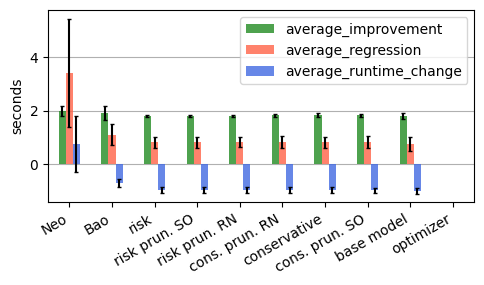

In [108]:
import matplotlib.pyplot as plt
features = ["average_improvement","average_regression","average_runtime_change"]
sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub.loc[:,features].plot.bar(logy=False,figsize=[5.5,2.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=30,ha='right')
plt.ylabel('seconds')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/roq_neo_bao_avg_runtime_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

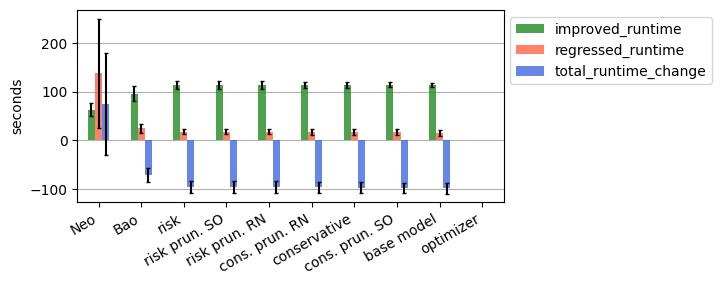

In [109]:
import matplotlib.pyplot as plt

features = ["improved_runtime","regressed_runtime","total_runtime_change"]
sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub.loc[:,features].plot.bar(logy=False,figsize=[5.5,2.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=30,ha='right')
plt.ylabel('seconds')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
# plt.savefig('./plots/roq_neo_bao_tot_runtime_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

In [110]:
runtimes_all_df.optimizer.sum()

498.8038558959961

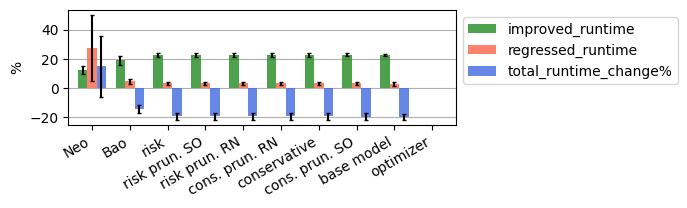

In [111]:
import matplotlib.pyplot as plt

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc = sub.copy()
sub_var_perc=sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100
ax = sub_perc.loc[sub_perc.index,["improved_runtime","regressed_runtime","total_runtime_change%"]].plot.bar(logy=False,
                            figsize=[5,1.5], yerr=sub_var_perc, capsize=1.5,
                            color=['forestgreen','tomato','royalblue'],alpha=0.8,width=0.75)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=30,ha='right')
plt.ylabel('%')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/roq_neo_bao_tot_runtime_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

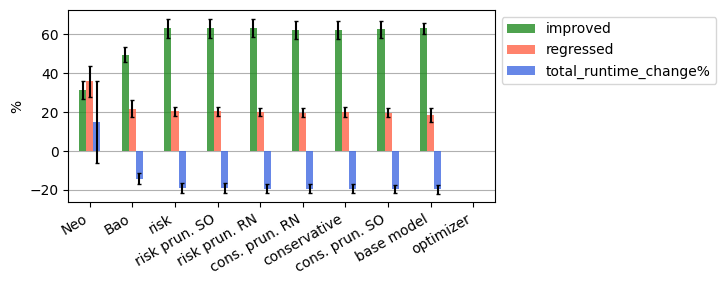

In [112]:
import matplotlib.pyplot as plt

# sub = sub.sort_values(by='total_runtime_change%',ascending=False)
# sub_perc=sub*100
# ax = sub_perc.loc[sub.index,["improved","regressed","total_runtime_change%"]].plot.bar(logy=False,figsize=[5.5,2.5],
#                               color=['forestgreen','tomato','royalblue'])

features = ["improved","regressed","total_runtime_change%"]
sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc=sub*100
sub_var_perc=sub_var*100
ax = sub_perc.loc[:,features].plot.bar(logy=False,figsize=[5.5,2.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc.loc[:,features],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=30,ha='right')
plt.ylabel('%')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/roq_neo_bao_perc_runtime_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

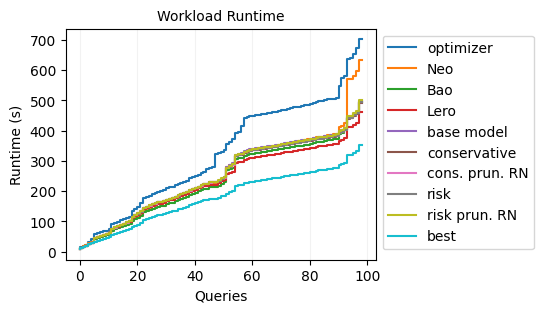

In [158]:
labels = [
                 'optimizer',#'optimizer pruned',
                 'Neo','Bao','Lero',
                #  'Neo+','Bao+',
                 'base model',#'base model pruned',
                #  'mc dropout',
                 'conservative','cons. prun. RN',
                 'risk','risk prun. RN',
                'best'
                ]

values = runtimes_all_df.loc[:,labels].values.T

plot_step_curve(values,labels,scale='linear',figsize=[4,3],
                save_to='./plots/runtime_step_ext_{}.png'.format(exp_id),bbox_to_anchor=(1.0, 1.0),show_fig=show_fig)

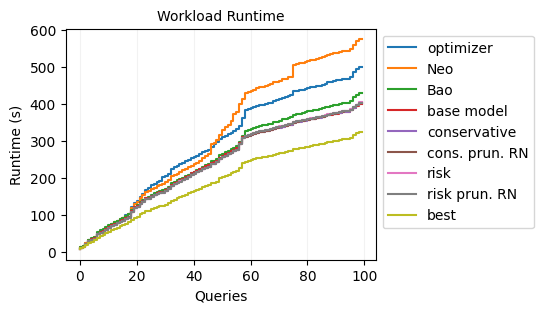

In [115]:
labels = [
                 'optimizer',#'optimizer pruned',
                 'Neo','Bao',
                #  'Neo+','Bao+',
                 'base model',#'base model pruned',
                #  'mc dropout',
                 'conservative','cons. prun. RN',
                 'risk','risk prun. RN',
                'best'
                ]

values = runtimes_all_df.loc[:,labels].values.T

plot_step_curve(values,labels,scale='linear',figsize=[4,3],
                save_to='./plots/runtime_step_ext_{}.png'.format(exp_id),bbox_to_anchor=(1.0, 1.0),show_fig=show_fig)

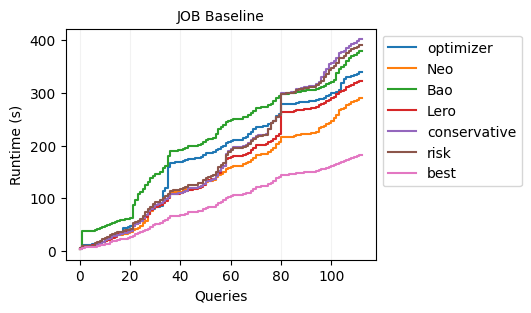

In [159]:
labels = [
                 'optimizer',#'optimizer pruned',
                 'Neo','Bao','Lero',
                #  'Neo+','Bao+',
                #  'base model',#'base model pruned',
                #  'mc dropout',
                 'conservative',#'cons. prun. RN',
                 'risk',#'risk prun. RN',
                'best'
                ]

values = job_runtimes_all_df.loc[:,labels].sort_index().values.T

plot_step_curve(values,labels,scale='linear',figsize=[4,3],title='JOB Baseline',
                save_to='./plots/runtime_step_ext_base_{}.png'.format(plots_id),bbox_to_anchor=(1.0, 1.0),show_fig=show_fig, legend=True)

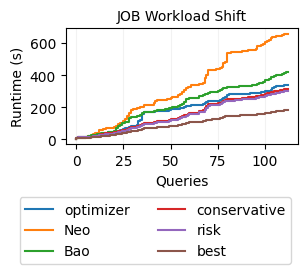

In [117]:
labels = [
                 'optimizer',#'optimizer pruned',
                 'Neo','Bao',
                #  'Neo+','Bao+',
                #  'base model',#'base model pruned',
                #  'mc dropout',
                 'conservative',#'cons. prun. RN',
                 'risk',#'risk prun. RN',
                'best'
                ]

values = job_runtimes_all_df.loc[:,labels].sort_index().values.T

plot_step_curve(values,labels,scale='linear',figsize=[3,1.5], title='JOB Workload Shift',
                save_to='./plots/runtime_step_ext_wlshift_{}.png'.format(plots_id),show_fig=show_fig,
                bbox_to_anchor=(1, -.4),ncol=2)

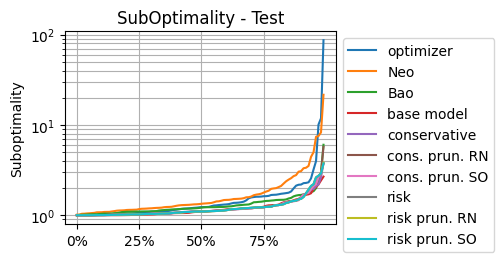

In [118]:
labels = [
        'optimizer',
        # 'optimizer pruned',
        'Neo','Bao',
        'base model',#'base model pruned',
        # 'mc dropout','mc dropout pruned',
        'conservative','cons. prun. RN','cons. prun. SO',
        'risk','risk prun. RN','risk prun. SO',
        ]
values = subopts_all_df.loc[:,labels].values.T

describe_plot(values,labels, 
              metric_label='Suboptimality',
              plot_title='SubOptimality - Test', 
              log_scale = True, figsize=[3.5,2.5],plot_x_every=25,
             bbox_to_anchor=(1.0, 1.0),
             show_fig=show_fig)

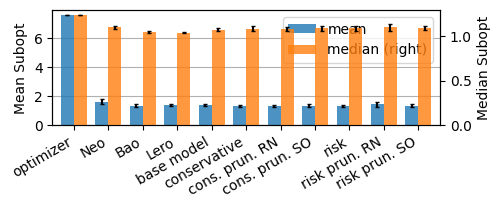

In [160]:
labels = [
        'optimizer',
        # 'optimizer pruned',
        'Neo','Bao','Lero',
        'base model',#'base model pruned',
        # 'mc dropout','mc dropout pruned',
        'conservative','cons. prun. RN','cons. prun. SO',
        'risk','risk prun. RN','risk prun. SO',
        ]
sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.loc[labels,['mean','median']].plot.bar(logy=False,secondary_y=['median'],figsize=[5,1.5],
                yerr=sub_var.loc[labels,['mean','median']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('Mean Subopt')
ax.right_ax.set_ylabel('Median Subopt')
plt.savefig('./plots/subopt_bar_main_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

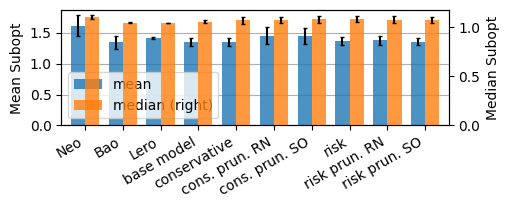

In [103]:
labels = [
        # 'optimizer',
        # 'optimizer pruned',
        'Neo','Bao','Lero',
        'base model',#'base model pruned',
        # 'mc dropout','mc dropout pruned',
        'conservative','cons. prun. RN','cons. prun. SO',
        'risk','risk prun. RN','risk prun. SO',
        ]

sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.loc[labels,['mean','median']].plot.bar(logy=False,secondary_y=['median'],figsize=[5,1.5],
                yerr=sub_var.loc[labels,['mean','median']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('Mean Subopt')
ax.right_ax.set_ylabel('Median Subopt')
plt.savefig('./plots/subopt_bar_main_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

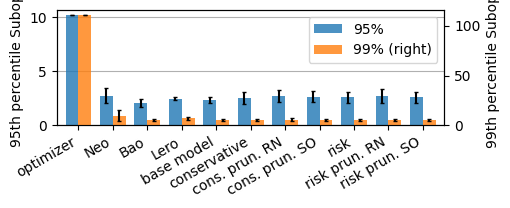

In [102]:
sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.loc[labels,['95%','99%']].plot.bar(logy=False,secondary_y=['99%'],figsize=[5,1.5],
                yerr=sub_var.loc[labels,['95%','99%']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('95th percentile Subopt')
ax.right_ax.set_ylabel('99th percentile Subopt')
plt.savefig('./plots/subopt_bar_tail_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

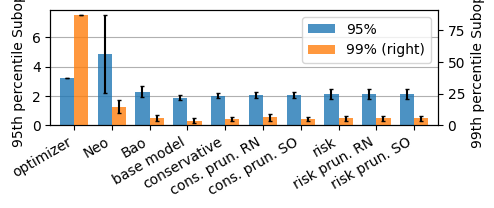

In [ ]:
sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.loc[labels,['95%','99%']].plot.bar(logy=False,secondary_y=['99%'],figsize=[5,1.5],
                yerr=sub_var.loc[labels,['95%','99%']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=0.75)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('95th percentile Subopt')
ax.right_ax.set_ylabel('99th percentile Subopt')
plt.savefig('./plots/subopt_bar_tail_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

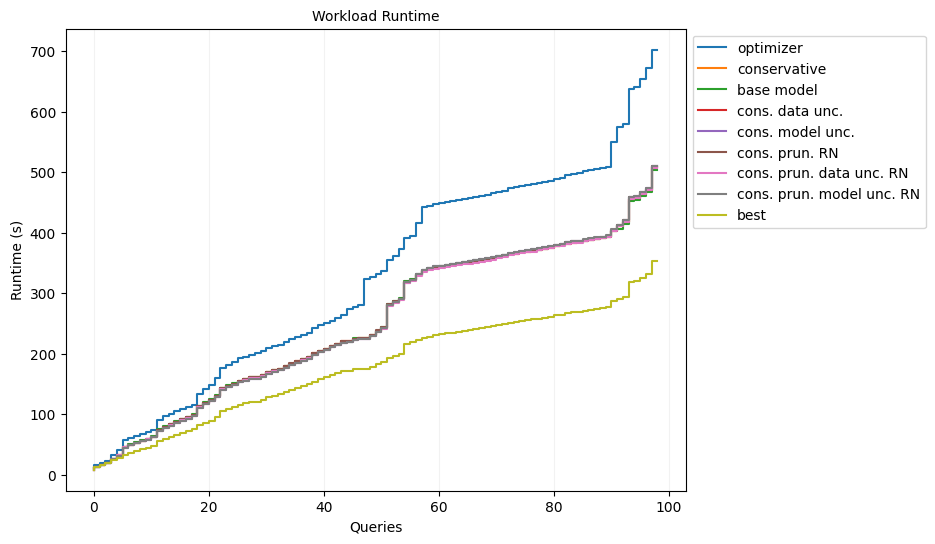

In [104]:
labels = [
                 'optimizer',
                 'conservative',
                 'base model',
                 'cons. data unc.', 
                 'cons. model unc.',
                 'cons. prun. RN', 
                 'cons. prun. data unc. RN', 
                 'cons. prun. model unc. RN',
                 'best'
                ]
values = runtimes_all_df.loc[:,labels].values.T

plot_step_curve(values,labels,scale='linear',figsize=[8,6],
                bbox_to_anchor=(1.0, 1.0),show_fig=show_fig)


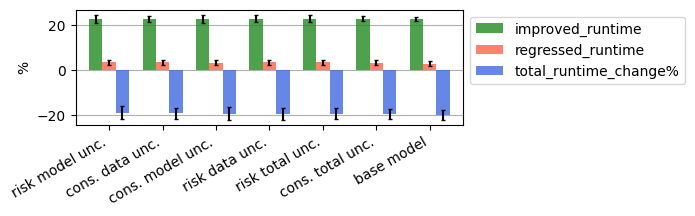

In [122]:
labels = [
                 'base model',
                 'cons. prun. RN',
                 'cons. prun. data unc. RN',
                 'cons. prun. model unc. RN',
                 'risk prun. RN', 
                 'risk prun. data unc. RN', 
                 'risk prun. model unc. RN', 
                ]

chart_labels = ['base model',
           'cons. total unc.','cons. data unc.','cons. model unc.',
           'risk total unc.','risk data unc.','risk model unc.'
           ]

features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]

sub.index=chart_labels
sub_var.index=chart_labels

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc = sub.copy()
sub_var_perc = sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub_perc.plot.bar(logy=False,figsize=[5,1.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=.75)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=30,ha='right')
plt.ylabel('%')
ax.grid(visible=True,which='both',axis='y')
# ax.set_ylim((-20,80))
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/runtime_bar_mode_data_unc_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

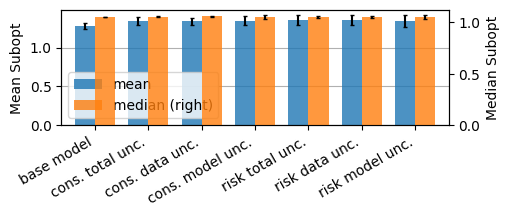

In [123]:
labels = [
                 'base model',
                 'cons. prun. SO',
                 'cons. prun. data unc. SO',
                 'cons. prun. model unc. SO',
                 'risk prun. SO', 
                 'risk prun. data unc. SO', 
                 'risk prun. model unc. SO', 
                ]

chart_labels = [
    'base model',
           'cons. total unc.','cons. data unc.','cons. model unc.',
           'risk total unc.','risk data unc.','risk model unc.'
           ]

features=['mean','50%']

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]

sub.index=chart_labels
sub_var.index=chart_labels

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.plot.bar(logy=False,secondary_y=['median'],figsize=[5,1.5],
                yerr=sub_var,
               align='center', alpha=0.8, ecolor='black', capsize=1.5, width=.75)
ax.set_xticks(ticks=np.arange(len(chart_labels)),labels=chart_labels,rotation=30,ha='right')
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
# ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('Mean Subopt')
ax.right_ax.set_ylabel('Median Subopt')
plt.savefig('./plots/subopt_bar_mode_data_unc_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

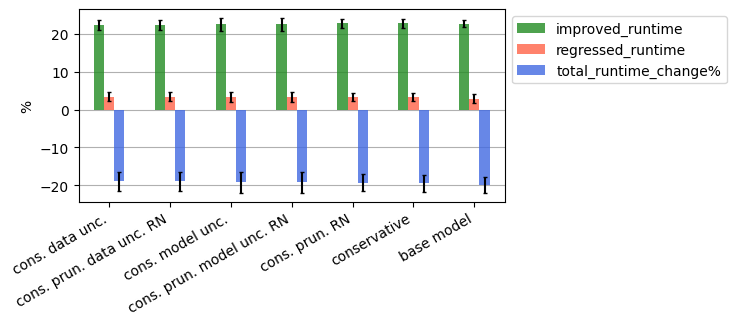

In [124]:
labels = [
                 'base model',
                 'conservative',
                 'cons. data unc.', 
                 'cons. model unc.',
                 'cons. prun. RN',
                 'cons. prun. data unc. RN',
                 'cons. prun. model unc. RN',
                ]
features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc = sub.copy()
sub_var_perc = sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub_perc.plot.bar(logy=False,figsize=[5.5,2.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=30,ha='right')
plt.ylabel('%')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/runtime_bar_cons_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

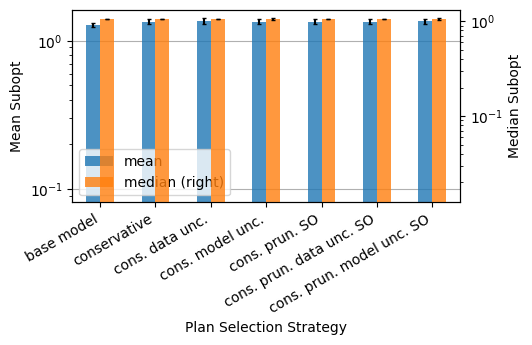

In [125]:
labels = [
                 'base model',
                 'conservative',
                 'cons. data unc.', 
                 'cons. model unc.',
                 'cons. prun. SO',
                 'cons. prun. data unc. SO',
                 'cons. prun. model unc. SO',
                ]

sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)
ax=sub.loc[labels,['mean','median']].plot.bar(logy=True,secondary_y=['median'],figsize=[5,2.5],
                yerr=sub_var.loc[labels,['mean','median']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('Mean Subopt')
ax.right_ax.set_ylabel('Median Subopt')
plt.savefig('./plots/subopt_bar_cons_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

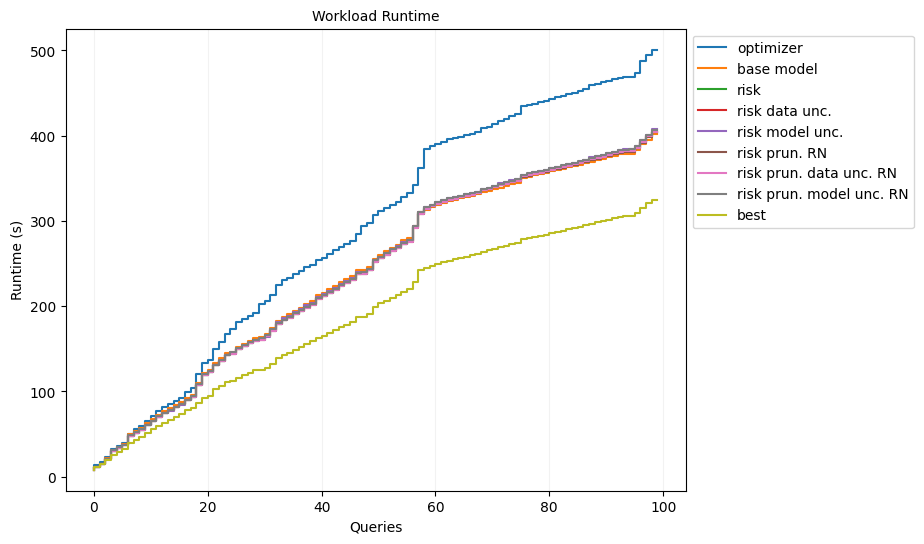

In [126]:
labels = [
                 'optimizer',
                 'base model',
                 'risk',
                 'risk data unc.', 
                 'risk model unc.',
                 'risk prun. RN', 
                 'risk prun. data unc. RN', 
                 'risk prun. model unc. RN', 
                 'best'
                ]

values = runtimes_all_df.loc[:,labels].values.T

plot_step_curve(values,labels,scale='linear',figsize=[8,6],
                bbox_to_anchor=(1.0, 1.0),show_fig=show_fig)

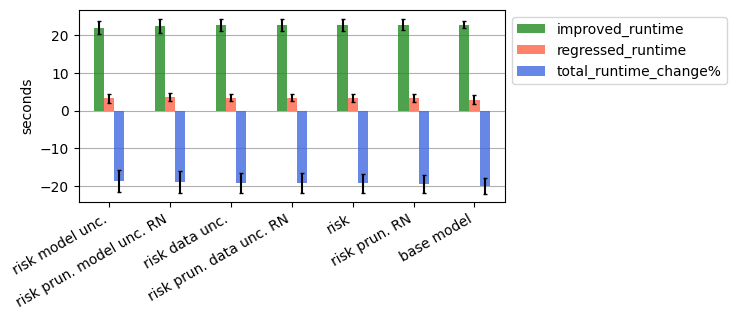

In [127]:
labels = [
                 'base model',
                 'risk',
                 'risk data unc.', 
                 'risk model unc.',
                 'risk prun. RN', 
                 'risk prun. data unc. RN', 
                 'risk prun. model unc. RN', 
                ]
features = ["improved_runtime","regressed_runtime","total_runtime_change%"]

sub = agg_res_all_df.loc[labels,features]
sub_var = agg_res_all_var_df.loc[labels,features]

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
sub_perc = sub.copy()
sub_var_perc = sub_var.copy()
sub_perc[["improved_runtime","regressed_runtime"]] = sub_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_var_perc[["improved_runtime","regressed_runtime"]] = sub_var_perc[["improved_runtime","regressed_runtime"]]/runtimes_all_df.optimizer.sum()
sub_perc=sub_perc*100
sub_var_perc=sub_var_perc*100

sub = sub.sort_values(by='total_runtime_change%',ascending=False)
ax = sub_perc.plot.bar(logy=False,figsize=[5.5,2.5],
            color=['forestgreen','tomato','royalblue'], yerr=sub_var_perc,
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=30,ha='right')
plt.ylabel('seconds')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
# plt.show()
plt.savefig('./plots/runtime_bar_risk_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)

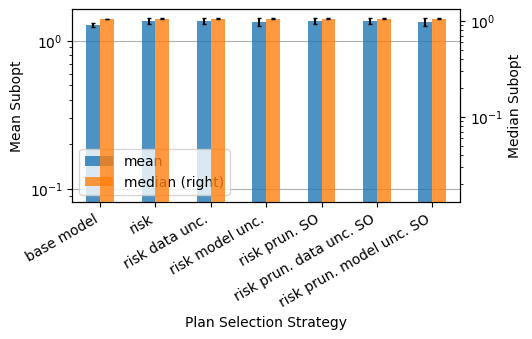

In [128]:
labels = [
                'base model',
                 'risk',
                 'risk data unc.', 
                 'risk model unc.',
                 'risk prun. SO', 
                 'risk prun. data unc. SO', 
                 'risk prun. model unc. SO', 
                ]

sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)

ax=sub.loc[labels,['mean','median']].plot.bar(logy=True,secondary_y=['median'],figsize=[5,2.5],
                yerr=sub_var.loc[labels,['mean','median']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('Mean Subopt')
ax.right_ax.set_ylabel('Median Subopt')
plt.savefig('./plots/subopt_bar_risk_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

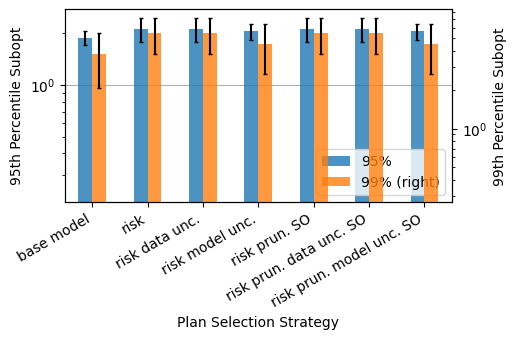

In [129]:
labels = [
                'base model',
                 'risk',
                 'risk data unc.', 
                 'risk model unc.',
                 'risk prun. SO', 
                 'risk prun. data unc. SO', 
                 'risk prun. model unc. SO', 
                ]

sub = agg_res_all_df.loc[labels,:]
sub_var = agg_res_all_var_df.loc[labels,:]

sub.rename({'50%':'median'},axis=1,inplace=True)
sub_var.rename({'50%':'median'},axis=1,inplace=True)

ax=sub.loc[labels,['95%','99%']].plot.bar(logy=True,secondary_y=['99%'],figsize=[5,2.5],
                yerr=sub_var.loc[labels,['95%','99%']],
               align='center', alpha=0.8, ecolor='black', capsize=1.5)
ax.set_xticks(ticks=np.arange(len(labels)),labels=labels,rotation=30,ha='right')
ax.grid(visible=True,which='major',axis='y')
ax.set_axisbelow(True)
ax.set_xlabel('Plan Selection Strategy')
ax.set_ylabel('95th Percentile Subopt')
ax.right_ax.set_ylabel('99th Percentile Subopt')
plt.savefig('./plots/subopt_bar_risk_tail_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

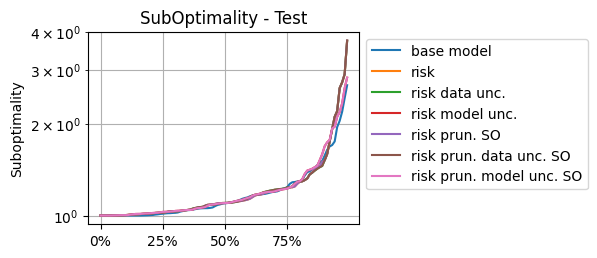

In [130]:
values = subopts_all_df.loc[:,labels].values.T

describe_plot(values,labels, 
              metric_label='Suboptimality',
              plot_title='SubOptimality - Test', 
              log_scale = True, figsize=[3.5,2.5],plot_x_every=25,
             save_to = './plots/sub_opt_line.png',
             bbox_to_anchor=(1.0, 1.0),
             show_fig=show_fig)

In [131]:
qerror_all = []
for i in qerror_dict:
    qerror_all.append(qerror_dict[i].values)
qerror_all=np.array(qerror_all)
qerror_all_df = qerror_dict[0].copy()
qerror_all_var_df = qerror_dict[0].copy()
qerror_all_df.loc[:, :] = qerror_all.mean(axis=0)
qerror_all_var_df.loc[:, :] = qerror_all.std(axis=0)

In [132]:
labels=['Bao','Neo','Roq']

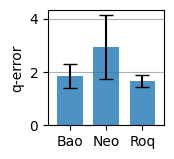

In [133]:
y = qerror_all_df[labels].mean(axis=0)
yerr = qerror_all_var_df[labels].mean(axis=0)
ax =y.plot.bar(logy=False,figsize=[1.5,1.5],yerr=yerr.T.values,
               align='center', alpha=0.8, ecolor='black', capsize=5,
               width=0.7)
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('q-error')
plt.xticks(rotation=0,ha='center')
# plt.legend(bbox_to_anchor=(1.0,1.0))
plt.savefig('./plots/qerror_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

In [134]:
res = qerror_all_df.describe(percentiles=[.5,.6,.7,.8,.90,.95,.99]).T
res.loc[:,['mean','std','50%','60%','70%','80%','90%','99%','max']]

,mean,std,50%,60%,70%,80%,90%,99%,max
Bao,1.849939,1.771114,1.456216,1.585496,1.756018,2.022309,2.621444,8.093021,43.061142
Neo,2.940257,4.862194,2.029715,2.230322,2.587492,3.056647,4.094449,20.749838,101.265022
Roq,1.647433,1.707351,1.236391,1.308303,1.417261,1.664928,2.432874,8.452528,29.822035
Roq MCDO,1.651028,1.690847,1.242717,1.318541,1.425524,1.687251,2.438324,8.324059,28.939985


In [135]:
res = qerror_all_var_df.describe(percentiles=[.5,.6,.7,.8,.90,.95,.99]).T
res.loc[:,['mean','50%','60%','70%','80%','90%','99%','max']]


,mean,50%,60%,70%,80%,90%,99%,max
Bao,0.449194,0.260481,0.324098,0.426589,0.578195,0.868997,3.429193,24.684465
Neo,1.188166,0.651154,0.828358,1.056987,1.419629,2.193220,9.689583,63.545330
Roq,0.223871,0.101791,0.122434,0.152062,0.211963,0.350101,2.980326,15.208779
Roq MCDO,0.229080,0.099539,0.125914,0.165193,0.228039,0.353895,2.914689,14.746054


In [136]:
corr_all = []
for i in corr_dict:
    corr_all.append(corr_dict[i].values)
corr_all=np.array(corr_all)
corr_all_df = corr_dict[0].copy()
corr_all_var_df = corr_dict[0].copy()
corr_all_df.loc[:, :] = corr_all.mean(axis=0)
corr_all_var_df.loc[:, :] = corr_all.std(axis=0)

In [21]:
corr_all_df

,Cost,Bao,Neo,Lero,Roq,Roq MCDO
Pearson,0.179374,0.278795,0.362303,0.315884,0.332704,0.329794
Spearman,0.790038,0.746030,0.713741,0.712446,0.741057,0.740662


In [22]:
corr_all_var_df

,Cost,Bao,Neo,Lero,Roq,Roq MCDO
Pearson,0.0,0.0,0.0,0.0,0.0,0.0
Spearman,0.0,0.0,0.0,0.0,0.0,0.0


In [162]:
labels = ['Cost','Neo','Bao','Lero','Roq']

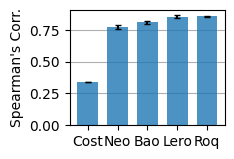

In [163]:

ax =corr_all_df.T[['Spearman']].loc[labels].plot.bar(logy=False,figsize=[2,1.5],yerr=corr_all_var_df.T[['Spearman']].loc[labels].T.values,
               align='center', alpha=0.8, ecolor='black', capsize=2.5,
               width=0.7)

ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Spearman\'s Corr.')
# plt.ylim((0.4,0.75))
plt.xticks(rotation=0,ha='center')
legend = ax.legend()
legend.remove()

plt.savefig('./plots/spearman_corr_bar_{}.png'.format(exp_id),bbox_inches='tight',dpi=300)
plt.show()

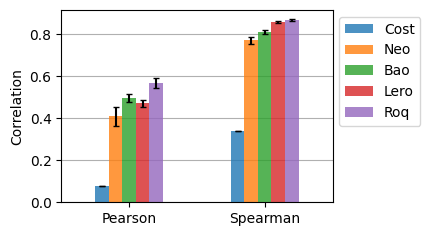

In [112]:
ax =corr_all_df.loc[:,labels].plot.bar(logy=False,figsize=[3.5,2.5],yerr=corr_all_var_df.loc[:,labels].T.values,
               align='center', alpha=0.8, ecolor='black', capsize=2.5)
ax.grid(visible=True,which='both',axis='y')
ax.set_axisbelow(True)
ax.set_ylabel('Correlation')
plt.xticks(rotation=0,ha='center')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()